## PFA Internship Bullpen Session Data

Data was collected from Trackman which was entered on a google sheet / excel sheet. 

**Notes About the dataset:** 
1. Columns "Velo Day 1-5" = Week 1,2,3,4 & 5 respectively.

##### Library Imports

In [186]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import mitosheet

import statsmodels
%matplotlib inline
# Set Seaborn style
sns.set(style="whitegrid")
import warnings
warnings.simplefilter("ignore")

In [3]:
pd.options.display.max_rows = 50

In [210]:
df = pd.read_csv('Full_Pitch_Report_Summer_PFA.csv')
# Calling the head of our data
df.head()

,Player,Unnamed: 1,Velo Day 1,Velo Day 2,Velo Day 3,Velo Day 4,Velo Day 5,Spin Day 1,Max Spin,Max_MPH,Change_Velo,Change_RPM,Vert Day 1,Max Vert,Change_Vert_Break,LT Velo Day 1,LT Velo Day 2
0,Jake Lawson,NaN,80,83.0,84.1,84.5,NaN,2100,2100,85,5,0,21,25,4,73.0,78.0
1,Matthew Helguera,NaN,81,84.0,85.2,85.3,85.7,1900,2300,86,5,400,19,23,4,74.0,82.0
2,Ayden Holker,NaN,85,89.0,88.9,88.2,90.2,2300,2500,90,5,200,20,24,4,82.0,87.0
3,Brian Xu,NaN,65,76.0,76.0,NaN,NaN,1600,2000,76,11,400,16,19,3,72.0,NaN
4,Cris Espino,NaN,81,84.0,84.8,85.5,NaN,2100,2200,86,5,100,16,17,1,76.0,NaN


In [211]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             43 non-null     object 
 1   Unnamed: 1         0 non-null      float64
 2   Velo Day 1         43 non-null     int64  
 3   Velo Day 2         42 non-null     float64
 4   Velo Day 3         39 non-null     float64
 5   Velo Day 4         28 non-null     float64
 6   Velo Day 5         8 non-null      float64
 7   Spin Day 1         43 non-null     int64  
 8   Max Spin           43 non-null     int64  
 9   Max_MPH            43 non-null     int64  
 10  Change_Velo        43 non-null     int64  
 11  Change_RPM         43 non-null     int64  
 12  Vert Day 1         43 non-null     int64  
 13  Max Vert           43 non-null     int64  
 14  Change_Vert_Break  43 non-null     int64  
 15  LT Velo Day 1      34 non-null     float64
 16  LT Velo Day 2      20 non-nu

In [212]:
# Shape of the dataframe
df.shape

(43, 17)

In [213]:
# Sample of the dataset
sample_df = df.sample()
sample_df

,Player,Unnamed: 1,Velo Day 1,Velo Day 2,Velo Day 3,Velo Day 4,Velo Day 5,Spin Day 1,Max Spin,Max_MPH,Change_Velo,Change_RPM,Vert Day 1,Max Vert,Change_Vert_Break,LT Velo Day 1,LT Velo Day 2
32,Austin Allen,NaN,79,83.0,NaN,NaN,NaN,1700,2000,83,4,300,22,23,1,NaN,NaN


### Data Cleaning 

In [214]:
# Columns of our dataset
df.columns

Index(['Player', 'Unnamed: 1', 'Velo Day 1', 'Velo Day 2', 'Velo Day 3',
       'Velo Day 4', 'Velo Day 5', 'Spin Day 1', 'Max Spin', 'Max_MPH',
       'Change_Velo', 'Change_RPM', 'Vert Day 1', 'Max Vert',
       'Change_Vert_Break', 'LT Velo Day 1', 'LT Velo Day 2'],
      dtype='object')

In [215]:
# deleting columns that are not useful
columns_to_delete = ['Unnamed: 1','LT Velo Day 1', 'LT Velo Day 2']

df = df.drop(columns_to_delete, axis=1)

In [216]:
# Summary total of missing values (As a whole)
df.isna().sum()

Player                0
Velo Day 1            0
Velo Day 2            1
Velo Day 3            4
Velo Day 4           15
Velo Day 5           35
Spin Day 1            0
Max Spin              0
Max_MPH               0
Change_Velo           0
Change_RPM            0
Vert Day 1            0
Max Vert              0
Change_Vert_Break     0
dtype: int64

In [217]:
# making a copy of our dataset
updated_df = df.copy()

In [218]:
# Checking unique values in the 'Player' column
pitchers = updated_df['Player'].unique()

In [219]:
# def vectorized_corrected_median_imputation_velocity(df):
#     """    Function to perform vectorized median imputation on specific columns of velocity data.
#     """
#     # Imputation for 'Velo Day 2'
#     df['Velo Day 2'] = df['Velo Day 2'].fillna(df['Velo Day 1'])

#     # anyImputation for 'Velo Day 3'
#     mask_day3 = df['Velo Day 3'].isna()
#     df.loc[mask_day3, 'Velo Day 3'] = df[mask_day3][['Velo Day 1', 'Velo Day 2']].apply(lambda x: np.nanmedian(x), axis=1)

#      # Imputation for 'Velo Day 4'
#     mask_day4 = df['Velo Day 4'].isna()
#     df.loc[mask_day4, 'Velo Day 4'] = df[mask_day4][['Velo Day 1', 'Velo Day 2', 'Velo Day 3']].apply(lambda x: np.nanmedian(x), axis=1)

#      # Imputation for 'Velo Day 5'
#     mask_day5 = df['Velo Day 5'].isna()
#     df.loc[mask_day5, 'Velo Day 5'] = df[mask_day5][['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4']].apply(lambda x: np.nanmedian(x), axis=1)
    
#     return df

# # Apply the function to the dataset
# full_pitch_report_function_imputed_corrected = vectorized_corrected_median_imputation_velocity(updated_df.copy())

# # Checking the number of NaN values again to confirm imputation
# nan_counts_after_function_vectorized_corrected_median_imputation = full_pitch_report_function_imputed_corrected[['Velo Day 2', 'Velo Day 3', 'Velo Day 4', 'Velo Day 5']].isna().sum()

# nan_counts_after_function_vectorized_corrected_median_imputation

In [220]:
def refined_vectorized_mean_imputation_velocity(df):
    """
    Function to perform refined vectorized mean imputation on specific columns of velocity data using a more vectorized approach.
    """
    # Imputation for 'Velo Day 2'
    df['Velo Day 2'] = df['Velo Day 2'].fillna(df['Velo Day 1'])

    # Imputation for 'Velo Day 3'
    mask_day3 = df['Velo Day 3'].isna()
    df.loc[mask_day3, 'Velo Day 3'] = df[mask_day3][['Velo Day 1', 'Velo Day 2']].mean(axis=1)

    # Imputation for 'Velo Day 4'
    mask_day4 = df['Velo Day 4'].isna()
    df.loc[mask_day4, 'Velo Day 4'] = df[mask_day4][['Velo Day 1', 'Velo Day 2', 'Velo Day 3']].mean(axis=1)

    # Imputation for 'Velo Day 5'
    mask_day5 = df['Velo Day 5'].isna()
    df.loc[mask_day5, 'Velo Day 5'] = df[mask_day5][['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4']].mean(axis=1)
    
    return df

# Apply the function to the dataset
updated_df = refined_vectorized_mean_imputation_velocity(updated_df.copy())

# Checking the number of NaN values again to confirm imputation
nan_counts_after_function_vectorized_v2 = updated_df[['Velo Day 2', 'Velo Day 3', 'Velo Day 4', 'Velo Day 5']].isna().sum()

nan_counts_after_function_vectorized_v2


Velo Day 2    0
Velo Day 3    0
Velo Day 4    0
Velo Day 5    0
dtype: int64

In [221]:
# Rechecking the NA values count (Want the main columns to be at 0)
updated_df.isna().sum()

Player               0
Velo Day 1           0
Velo Day 2           0
Velo Day 3           0
Velo Day 4           0
Velo Day 5           0
Spin Day 1           0
Max Spin             0
Max_MPH              0
Change_Velo          0
Change_RPM           0
Vert Day 1           0
Max Vert             0
Change_Vert_Break    0
dtype: int64

In [16]:
updated_df

,Player,Velo Day 1,Velo Day 2,Velo Day 3,Velo Day 4,Velo Day 5,Spin Day 1,Max Spin,Max_MPH,Change_Velo,Change_RPM,Vert Day 1,Max Vert,Change_Vert_Break,LT Velo Day 1,LT Velo Day 2
0,Jake Lawson,80,83.0,84.1,84.500000,82.900000,2100,2100,85,5,0,21,25,4,73.0,78.0
1,Matthew Helguera,81,84.0,85.2,85.300000,85.700000,1900,2300,86,5,400,19,23,4,74.0,82.0
2,Ayden Holker,85,89.0,88.9,88.200000,90.200000,2300,2500,90,5,200,20,24,4,82.0,87.0
3,Brian Xu,65,76.0,76.0,72.333333,72.333333,1600,2000,76,11,400,16,19,3,72.0,NaN
4,Cris Espino,81,84.0,84.8,85.500000,83.825000,2100,2200,86,5,100,16,17,1,76.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Aaron Banfield,77,77.0,79.5,80.300000,80.100000,1800,2100,80,3,300,18,18,0,NaN,NaN
39,Morgan Patito,81,84.1,81.9,82.333333,82.333333,2000,2000,84,3,0,19,19,0,83.8,NaN
40,Aiden Cube,79,83.0,83.3,83.200000,82.125000,1700,2100,83,4,400,19,19,0,76.0,NaN
41,Nathan Ries,85,85.0,88.5,86.166667,86.166667,2100,2300,89,4,200,19,22,3,80.0,80.0


In [17]:
updated_df.describe()

,Velo Day 1,Velo Day 2,Velo Day 3,Velo Day 4,Velo Day 5,Spin Day 1,Max Spin,Max_MPH,Change_Velo,Change_RPM,Vert Day 1,Max Vert,Change_Vert_Break,LT Velo Day 1,LT Velo Day 2
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,34.000000,20.000000
mean,77.860465,81.267442,81.123256,81.179845,80.523643,1934.883721,2172.093023,82.255814,4.395349,237.209302,17.55814,20.000000,2.441860,74.847059,80.550000
std,6.266241,5.844604,5.860921,5.898189,5.965555,208.033561,194.355567,5.699177,1.788049,111.319480,3.37570,3.309438,1.749862,5.017076,4.784569
min,65.000000,68.000000,65.400000,65.300000,66.175000,1500.000000,1700.000000,68.000000,2.000000,0.000000,8.00000,9.000000,0.000000,65.000000,71.000000
25%,73.000000,76.000000,76.750000,76.950000,75.825000,1800.000000,2000.000000,78.000000,3.000000,200.000000,16.00000,18.500000,1.000000,71.250000,78.000000
50%,79.000000,83.000000,81.700000,81.000000,81.000000,1900.000000,2200.000000,83.000000,4.000000,200.000000,19.00000,21.000000,2.000000,74.500000,81.000000
75%,82.000000,85.000000,85.350000,85.700000,85.437500,2100.000000,2300.000000,86.000000,5.000000,300.000000,19.00000,22.000000,3.000000,77.750000,83.500000
max,91.000000,93.000000,92.000000,92.000000,92.000000,2300.000000,2600.000000,93.000000,11.000000,400.000000,25.00000,27.000000,8.000000,84.000000,89.000000


In [18]:
# Group by 'Player' and calculate summary statistics.
grouped_player = updated_df.groupby('Player').describe()
grouped_player

Velo Day 1                                          \
                      count  mean std   min   25%   50%   75%   max   
Player                                                                
Aaron Banfield          1.0  77.0 NaN  77.0  77.0  77.0  77.0  77.0   
Aiden Cube              1.0  79.0 NaN  79.0  79.0  79.0  79.0  79.0   
Austin Allen            1.0  79.0 NaN  79.0  79.0  79.0  79.0  79.0   
Ayden Holker            1.0  85.0 NaN  85.0  85.0  85.0  85.0  85.0   
Brett Rizzo             1.0  74.0 NaN  74.0  74.0  74.0  74.0  74.0   
Brian Xu                1.0  65.0 NaN  65.0  65.0  65.0  65.0  65.0   
Cris Espino             1.0  81.0 NaN  81.0  81.0  81.0  81.0  81.0   
Eli Kraatz              1.0  67.0 NaN  67.0  67.0  67.0  67.0  67.0   
Eric Rohrer             1.0  82.0 NaN  82.0  82.0  82.0  82.0  82.0   
Ethan Ramallo           1.0  71.0 NaN  71.0  71.0  71.0  71.0  71.0   
Evan Blacksher          1.0  71.0 NaN  71.0  71.0  71.0  71.0  71.0   
Gage Wiese              1.0  71.0 NaN  71.0  71.0  71.0  71.0  71.0   
Garrett Green           1.0  75.0 NaN  75.0  75.0  75.0  75.0  75.0   
Gavin Martindale        1.0  69.0 NaN  69.0  69.0  69.0  69.0  69.0   
Gideon Evans            1.0  66.0 NaN  66.0  66.0  66.0  66.0  66.0   
Jack Holguin            1.0  75.0 NaN  75.0  75.0  75.0  75.0  75.0   
Jack Trujillo           1.0  74.0 NaN  74.0  74.0  74.0  74.0  74.0   
Jacob Jacome            1.0  86.0 NaN  86.0  86.0  86.0  86.0  86.0   
Jacob Magna             1.0  84.0 NaN  84.0  84.0  84.0  84.0  84.0   
Jake Furnald            1.0  72.0 NaN  72.0  72.0  72.0  72.0  72.0   
Jake Lawson             1.0  80.0 NaN  80.0  80.0  80.0  80.0  80.0   
Jake Van Noy            1.0  79.0 NaN  79.0  79.0  79.0  79.0  79.0   
Jaycee Flores           1.0  84.0 NaN  84.0  84.0  84.0  84.0  84.0   
Joe O'Regan             1.0  83.0 NaN  83.0  83.0  83.0  83.0  83.0   
Justin Ries             1.0  80.0 NaN  80.0  80.0  80.0  80.0  80.0   
Liam Thatcher           1.0  85.0 NaN  85.0  85.0  85.0  85.0  85.0   
Lukas Magna             1.0  66.0 NaN  66.0  66.0  66.0  66.0  66.0   
Luke Pollard            1.0  79.0 NaN  79.0  79.0  79.0  79.0  79.0   
Matthew Helguera        1.0  81.0 NaN  81.0  81.0  81.0  81.0  81.0   
Morgan Patito           1.0  81.0 NaN  81.0  81.0  81.0  81.0  81.0   
Nate Garcia             1.0  81.0 NaN  81.0  81.0  81.0  81.0  81.0   
Nathan Ries             1.0  85.0 NaN  85.0  85.0  85.0  85.0  85.0   
Neill Natori            1.0  72.0 NaN  72.0  72.0  72.0  72.0  72.0   
Noah Acevado            1.0  73.0 NaN  73.0  73.0  73.0  73.0  73.0   
Owen Dunn               1.0  81.0 NaN  81.0  81.0  81.0  81.0  81.0   
Patrick Mollett         1.0  73.0 NaN  73.0  73.0  73.0  73.0  73.0   
Reed Miller             1.0  82.0 NaN  82.0  82.0  82.0  82.0  82.0   
Robert Duran            1.0  82.0 NaN  82.0  82.0  82.0  82.0  82.0   
Ryan Verdugo            1.0  91.0 NaN  91.0  91.0  91.0  91.0  91.0   
Samuel Duenas           1.0  78.0 NaN  78.0  78.0  78.0  78.0  78.0   
Sean Suriyaniel         1.0  85.0 NaN  85.0  85.0  85.0  85.0  85.0   
Stephen Escarega        1.0  84.0 NaN  84.0  84.0  84.0  84.0  84.0   
Trent Merrill           1.0  80.0 NaN  80.0  80.0  80.0  80.0  80.0   

                 Velo Day 2        ... LT Velo Day 1       LT Velo Day 2  \
                      count  mean  ...           75%   max         count   
Player                             ...                                     
Aaron Banfield          1.0  77.0  ...           NaN   NaN           0.0   
Aiden Cube              1.0  83.0  ...          76.0  76.0           0.0   
Austin Allen            1.0  83.0  ...           NaN   NaN           0.0   
Ayden Holker            1.0  89.0  ...          82.0  82.0           1.0   
Brett Rizzo             1.0  80.0  ...          75.0  75.0           1.0   
Brian Xu                1.0  76.0  ...          72.0  72.0           0.0   
Cris Espino             1.0  84.0  ...          76.0  76.0        

In [761]:
# Save the DataFrame to a CSV file
# csv_filename = 'PFA_Updated_Data_PitchReports.csv'
# updated_df.to_csv(csv_filename, index=False)

### EDA Analysis

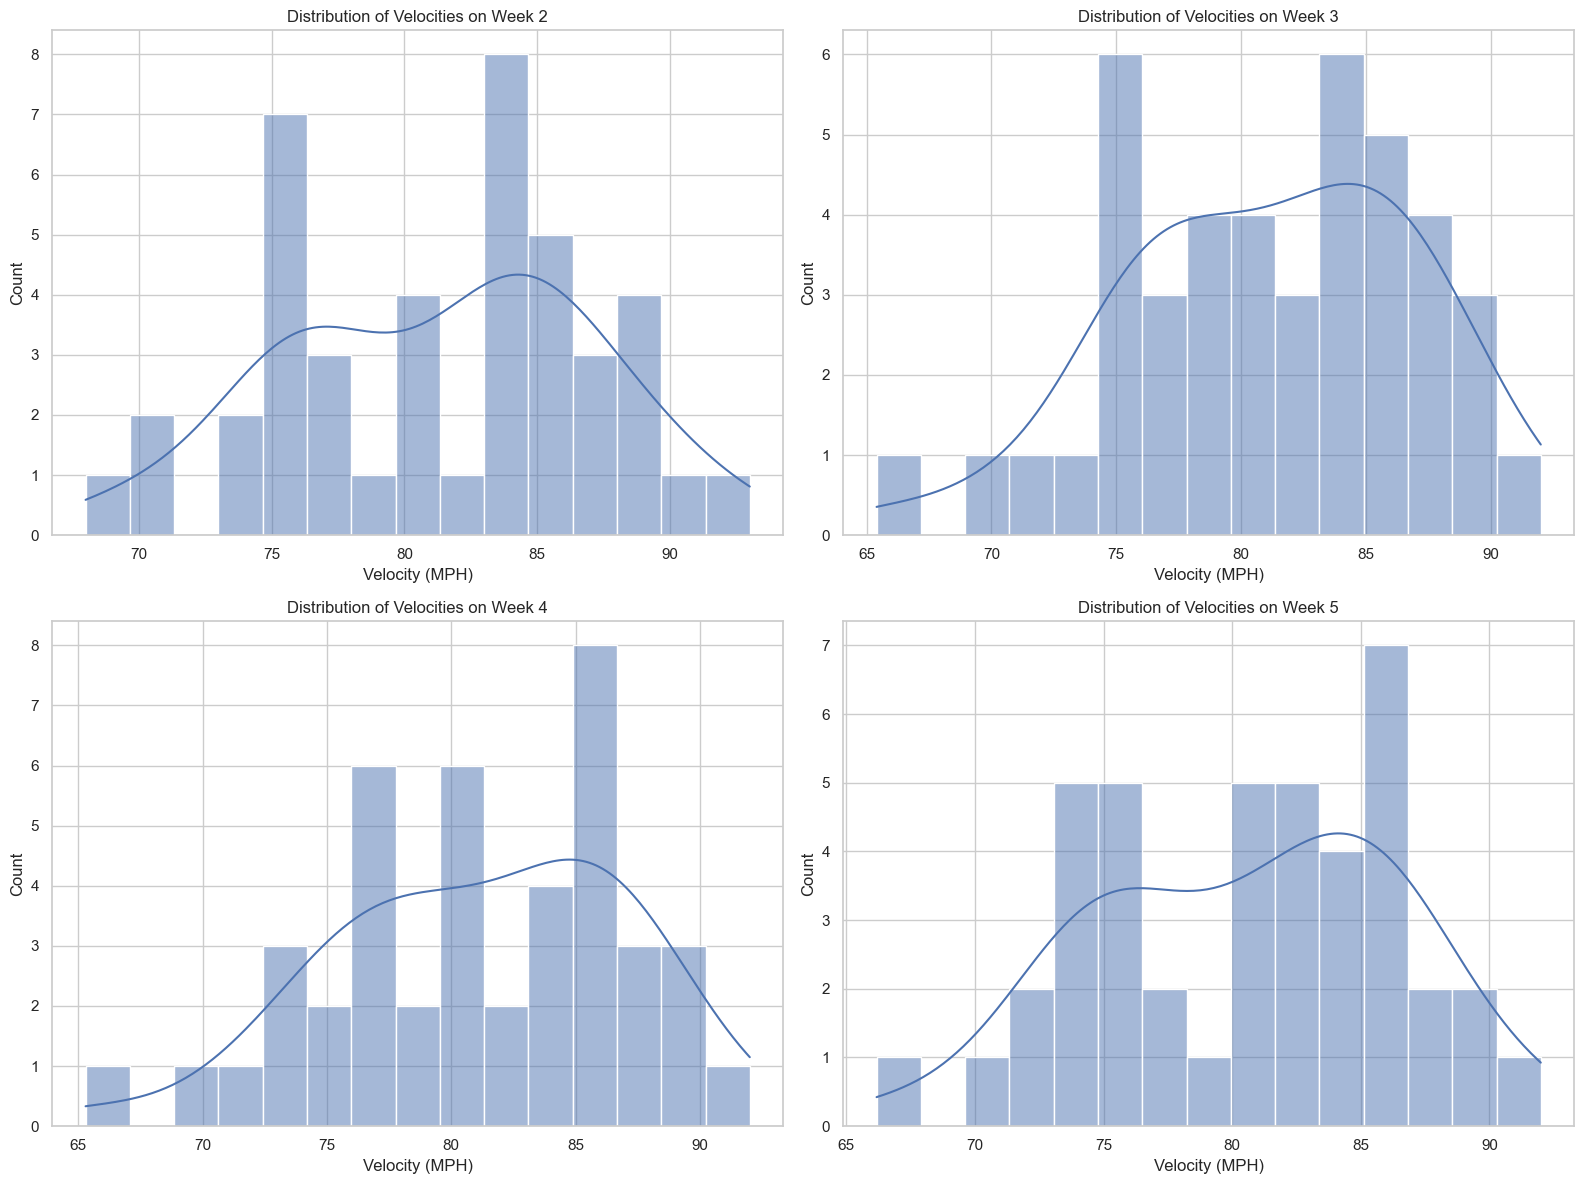

In [153]:
# Plotting histograms again for velocities on Days 2, 3, 4, and 5
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Velo Day 2
sns.histplot(updated_df['Velo Day 2'].dropna(), ax=axes[0, 0], kde=True, bins=15)
axes[0, 0].set_title('Distribution of Velocities on Week 2')
axes[0, 0].set_xlabel('Velocity (MPH)')
axes[0, 0].grid(True)

# Velo Day 3
sns.histplot(updated_df['Velo Day 3'].dropna(), ax=axes[0, 1], kde=True, bins=15)
axes[0, 1].set_title('Distribution of Velocities on Week 3')
axes[0, 1].set_xlabel('Velocity (MPH)')
axes[0, 1].grid(True)

# Velo Day 4
sns.histplot(updated_df['Velo Day 4'].dropna(), ax=axes[1, 0], kde=True, bins=15)
axes[1, 0].set_title('Distribution of Velocities on Week 4')
axes[1, 0].set_xlabel('Velocity (MPH)')
axes[1, 0].grid(True)

# Velo Day 5
sns.histplot(updated_df['Velo Day 5'].dropna(), ax=axes[1, 1], kde=True, bins=15)
axes[1, 1].set_title('Distribution of Velocities on Week 5')
axes[1, 1].set_xlabel('Velocity (MPH)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

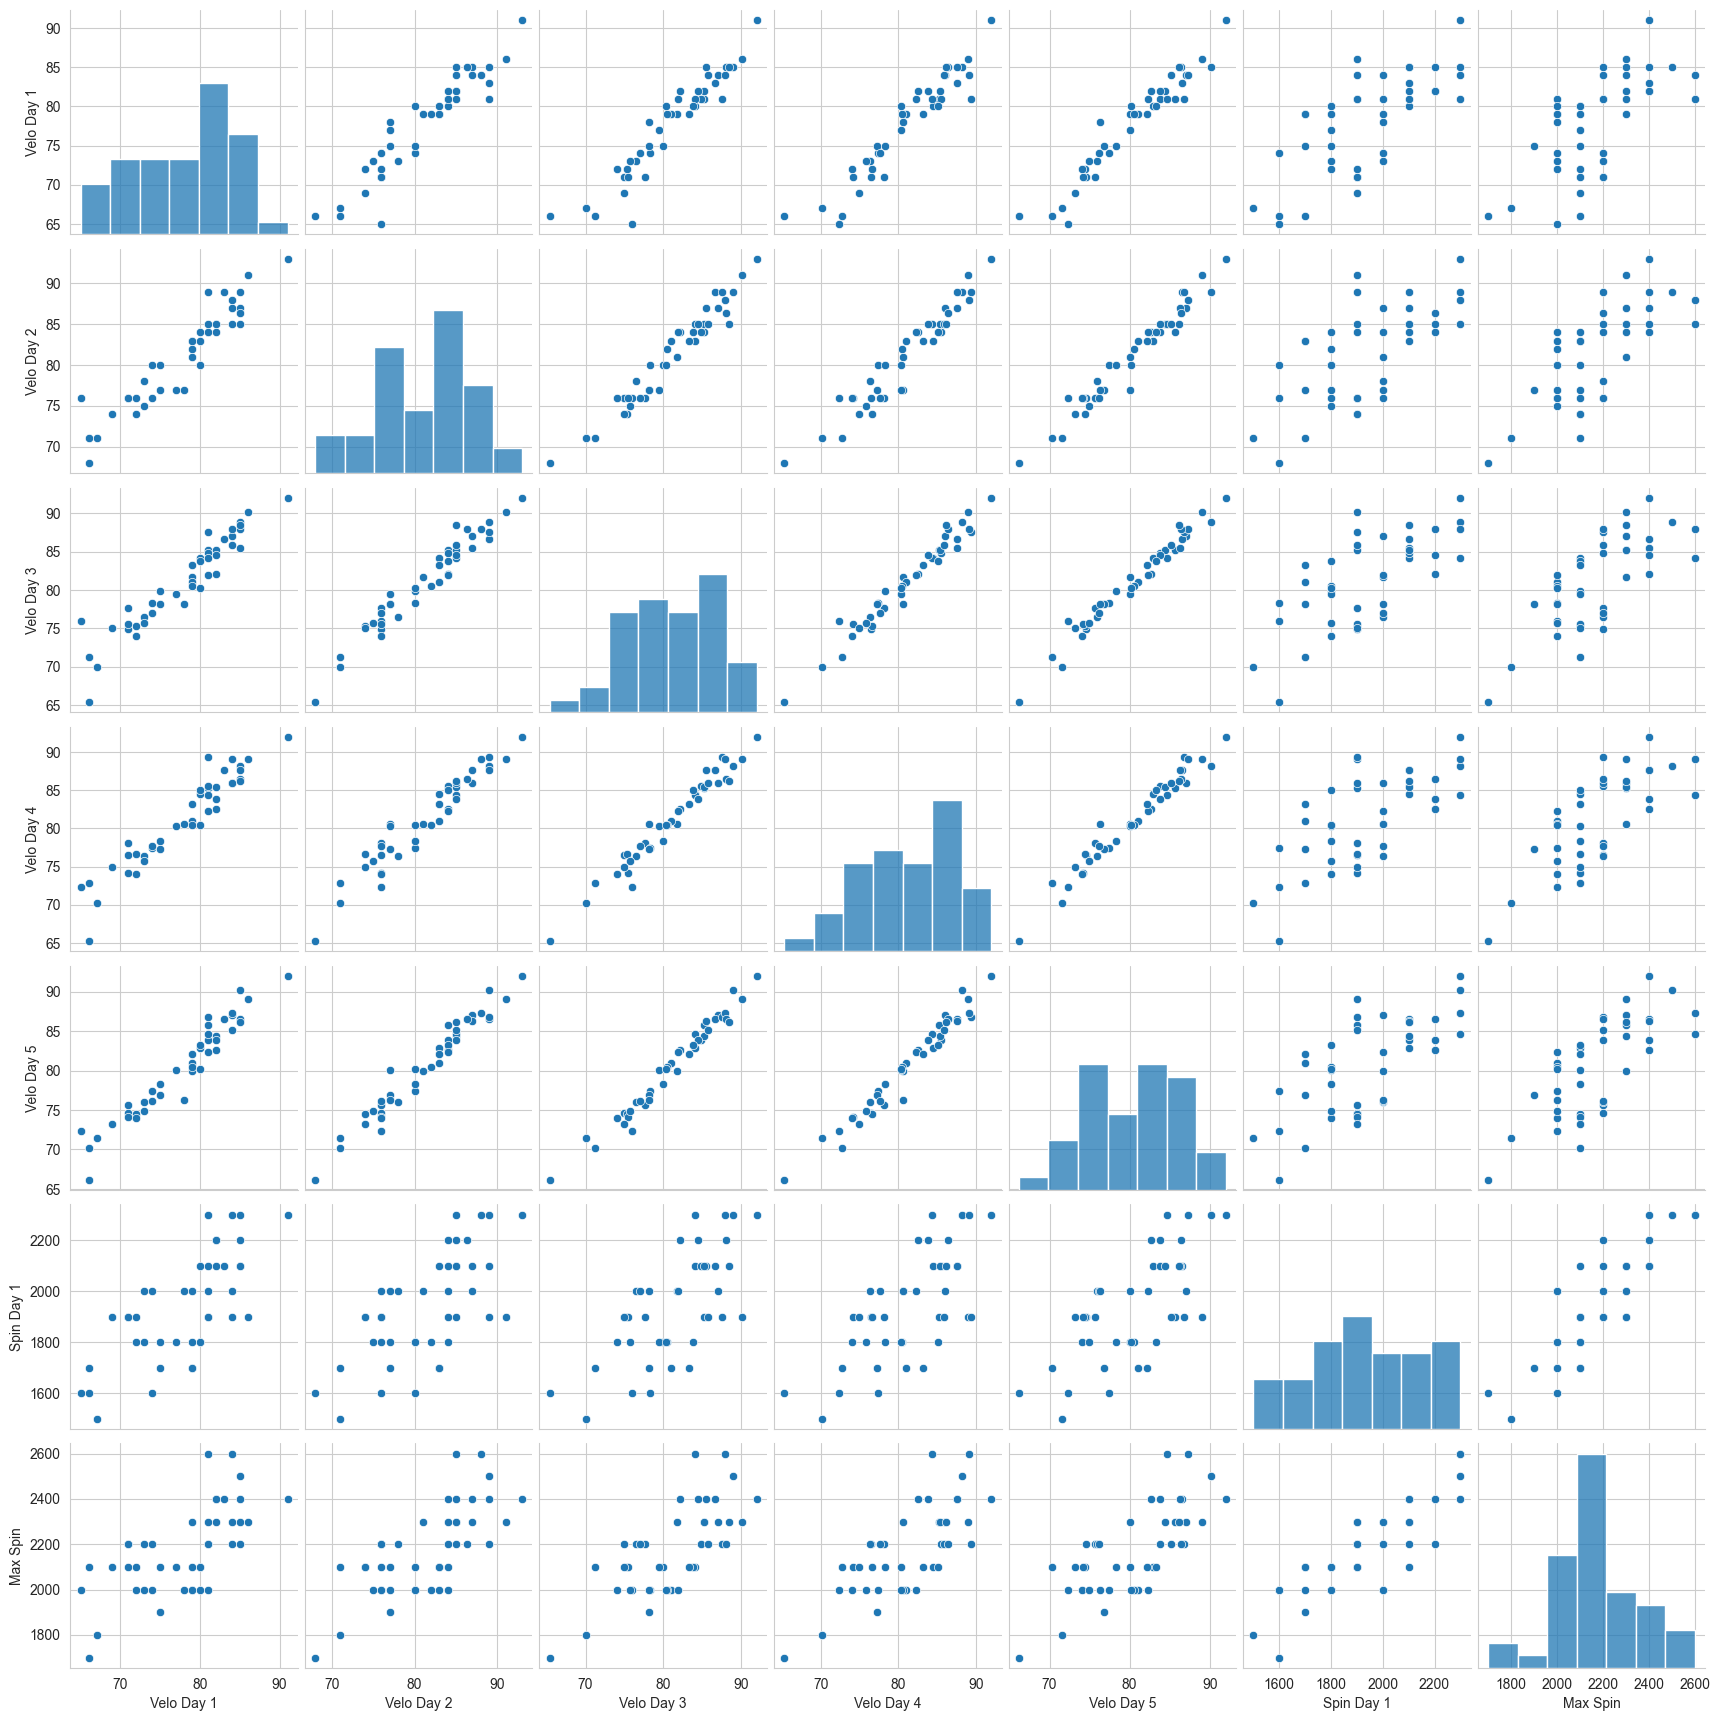

In [764]:
# List of columns you want to include in the pair plot
columns_of_interest = ['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4',
       'Velo Day 5', 'Spin Day 1', 'Max Spin']
# Create a pair plot with selected columns
sns.pairplot(data=updated_df[columns_of_interest])


/var/folders/bx/d62866193gz6gh4g9y98xyb40000gn/T/ipykernel_433/2281897082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(updated_df.corr(),annot=True)


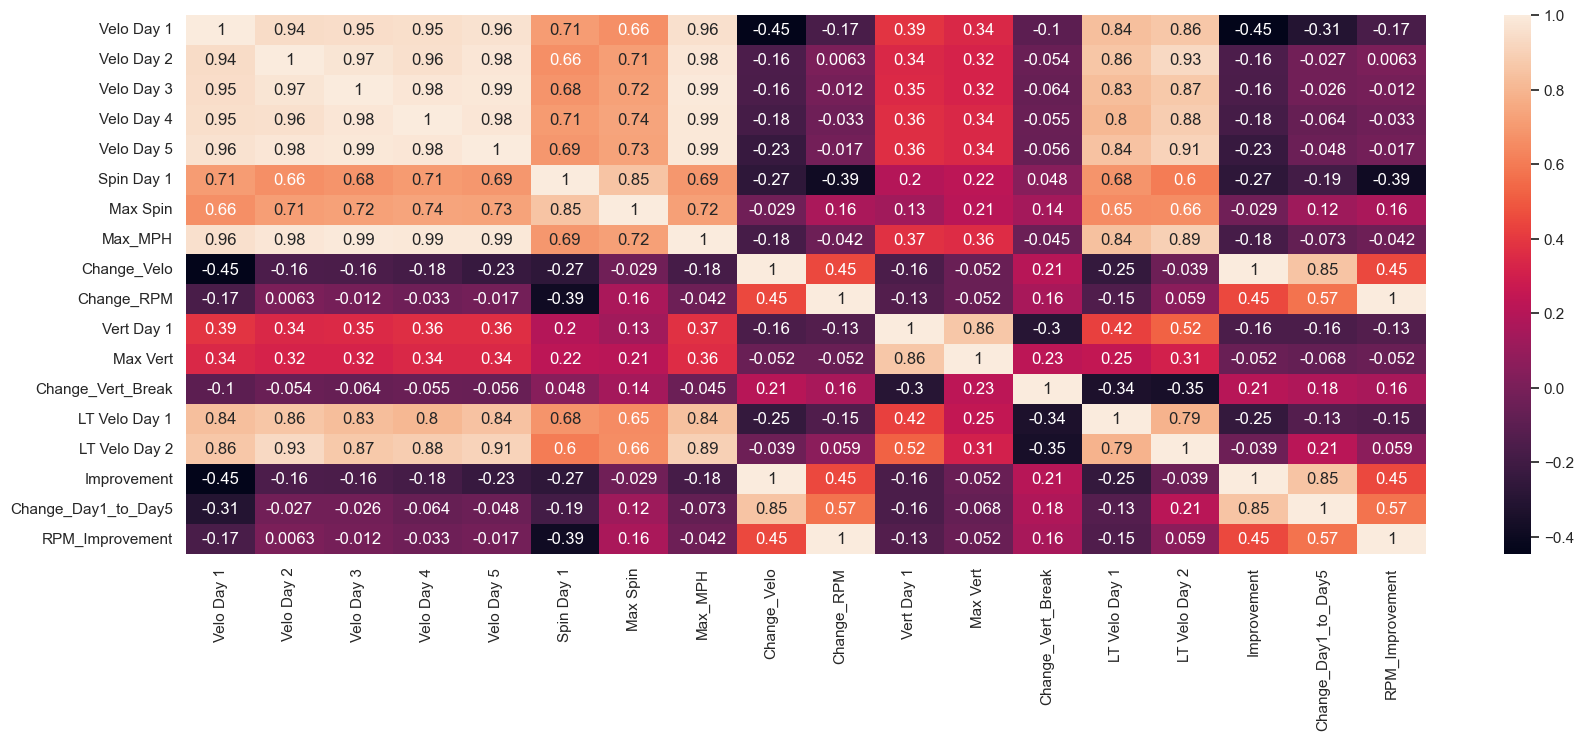

In [160]:
# Heatmap to visually see correaltions 
sns.heatmap(updated_df.corr(),annot=True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

In [28]:
updated_df.columns

Index(['Player', 'Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4',
       'Velo Day 5', 'Spin Day 1', 'Max Spin', 'Max_MPH', 'Change_Velo',
       'Change_RPM', 'Vert Day 1', 'Max Vert', 'Change_Vert_Break',
       'LT Velo Day 1', 'LT Velo Day 2'],
      dtype='object')

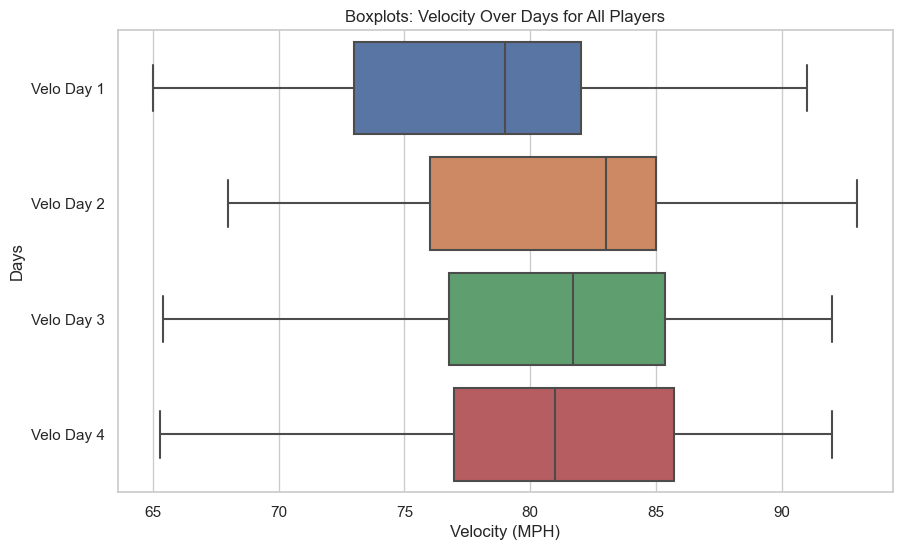

In [161]:
# Columns for each day
day_columns = ['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4']

# Boxplots: Velocity Over Days for all players
plt.figure(figsize=(10, 6))
sns.boxplot(data=updated_df[day_columns], orient='h')
plt.title('Boxplots: Velocity Over Days for All Players')
plt.xlabel('Velocity (MPH)')
plt.ylabel('Days')
plt.show()

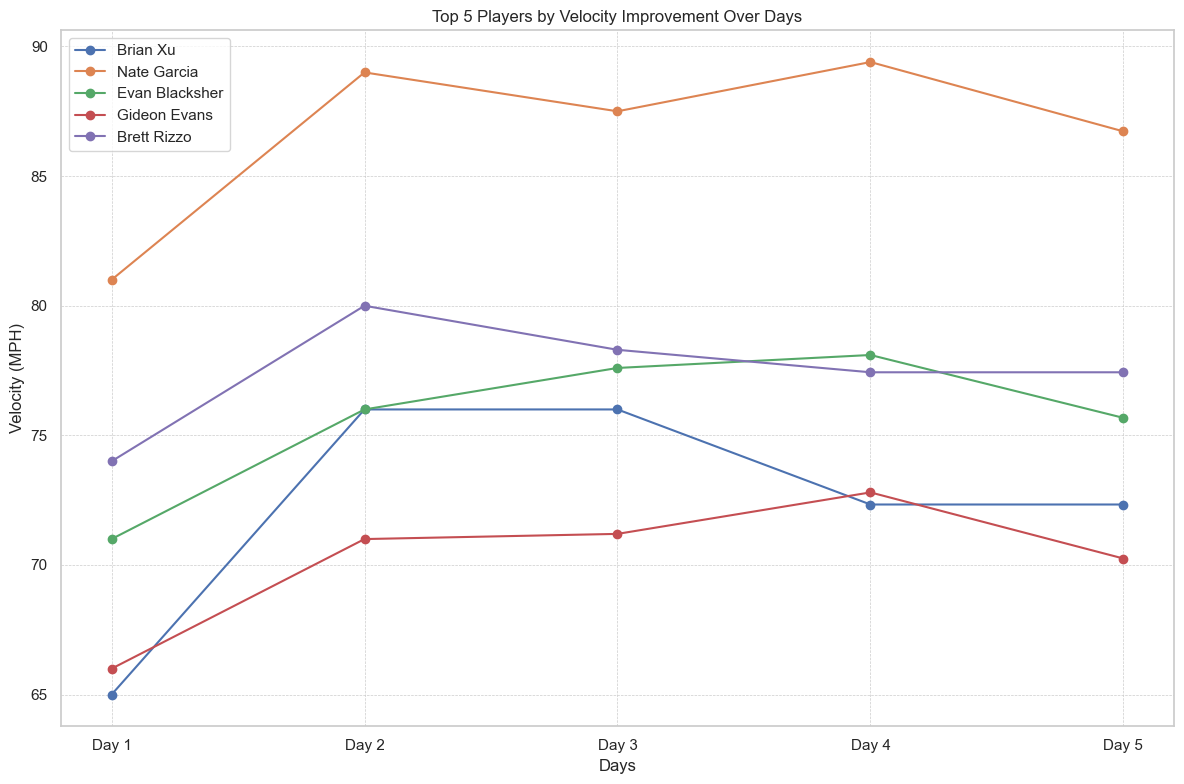

In [162]:
# Calculate improvement for each player
updated_df['Improvement'] = updated_df['Max_MPH'] - updated_df['Velo Day 1']

# Sort the data by improvement and select top 5 players
top_5_players = updated_df.sort_values(by='Improvement', ascending=False).head(5)

# Plotting the velocities for top 5 players across days
plt.figure(figsize=(12,8))

for index, row in top_5_players.iterrows():
    plt.plot(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'], row[1:6], label=row['Player'], marker='o')

plt.title('Top 5 Players by Velocity Improvement Over Days')
plt.xlabel('Days')
plt.ylabel('Velocity (MPH)')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

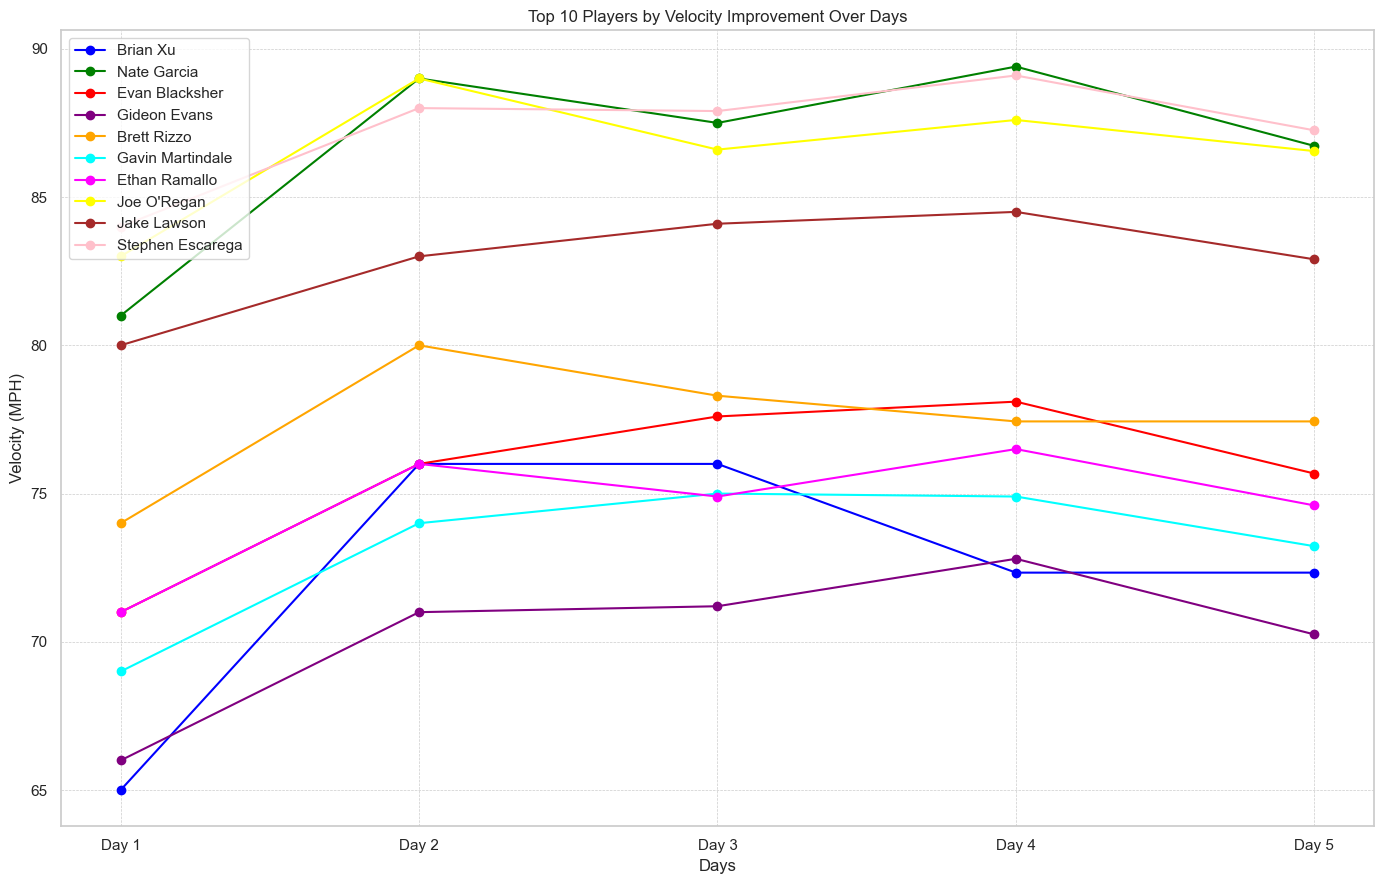

In [163]:
# Select top 10 players based on improvement
top_10_players = updated_df.sort_values(by='Improvement', ascending=False).head(10)

# Define a list of distinct colors for the top 10 players
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

plt.figure(figsize=(14,9))

# Plotting the velocities for top 10 players with distinct colors
for index, (color, (_, row)) in enumerate(zip(colors, top_10_players.iterrows())):
    plt.plot(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'], row[1:6], label=row['Player'], marker='o', color=color)

plt.title('Top 10 Players by Velocity Improvement Over Days')
plt.xlabel('Days')
plt.ylabel('Velocity (MPH)')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


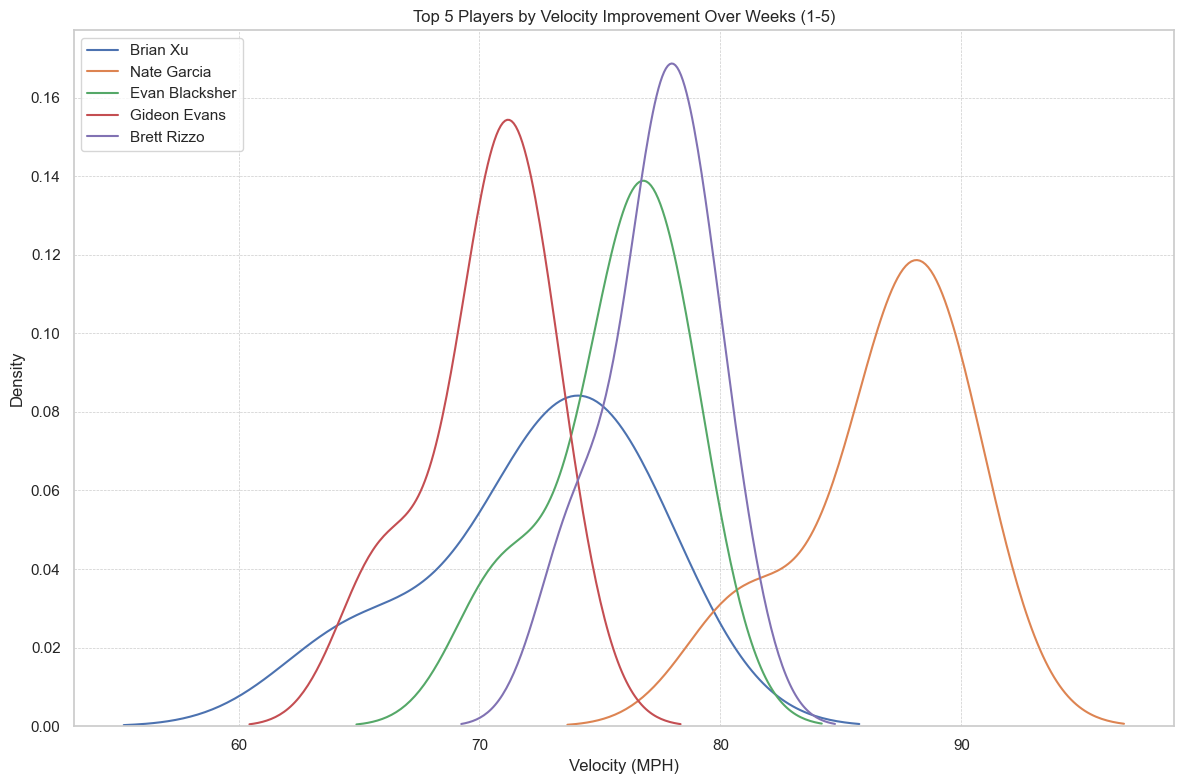

In [164]:
# Calculate improvement for each player
updated_df['Improvement'] = updated_df['Max_MPH'] - updated_df['Velo Day 1']

# Sort the data by improvement and select top 5 players
top_5_players = updated_df.sort_values(by='Improvement', ascending=False).head(5)

# Plotting the KDE chart for top 5 players' velocity improvement across days
plt.figure(figsize=(12, 8))
for index, row in top_5_players.iterrows():
    sns.kdeplot(row[1:6], label=row['Player'])

plt.title('Top 5 Players by Velocity Improvement Over Weeks (1-5)')
plt.xlabel('Velocity (MPH)')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

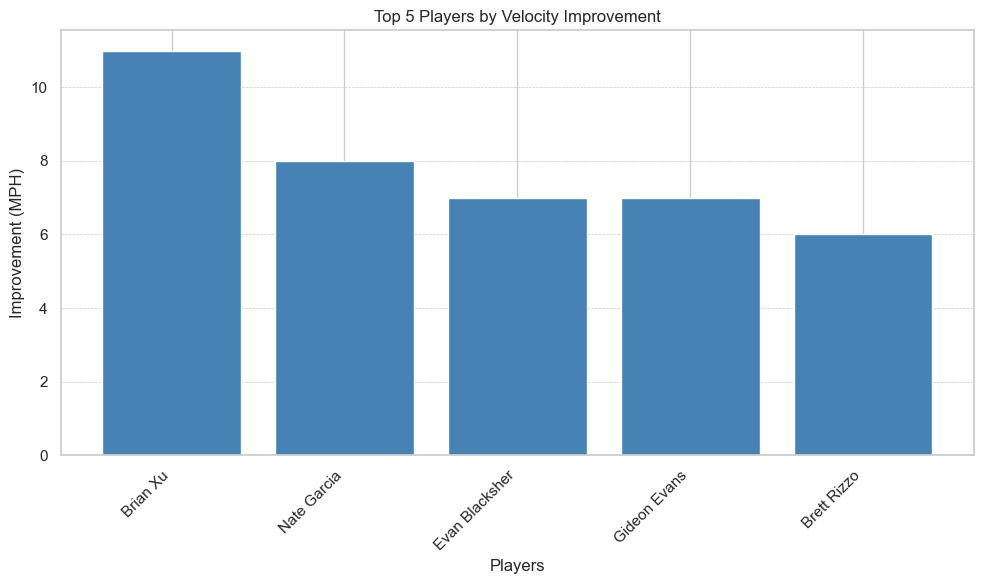

In [165]:
# Calculate improvement for each player
updated_df['Improvement'] = updated_df['Max_MPH'] - updated_df['Velo Day 1']

# Sort the data by improvement and select top 5 players
top_5_players = updated_df.sort_values(by='Improvement', ascending=False).head(5)

# Plotting the improvement bar chart for top 5 players
plt.figure(figsize=(10,6))
plt.bar(top_5_players['Player'], top_5_players['Improvement'], color='steelblue')
plt.title('Top 5 Players by Velocity Improvement')
plt.xlabel('Players')
plt.ylabel('Improvement (MPH)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

### Deliverable 

**Questions**

1. Ranking the top 5 or 10 players that are improving in velocity, RPM, and vertical break.
2. Comparing Spin rate, MPH, and vertical break.
3. Based on the small amount can we find which players are consistent or improving.

In [166]:
updated_df.columns 

Index(['Player', 'Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4',
       'Velo Day 5', 'Spin Day 1', 'Max Spin', 'Max_MPH', 'Change_Velo',
       'Change_RPM', 'Vert Day 1', 'Max Vert', 'Change_Vert_Break',
       'LT Velo Day 1', 'LT Velo Day 2', 'Improvement', 'Change_Day1_to_Day5',
       'RPM_Improvement'],
      dtype='object')

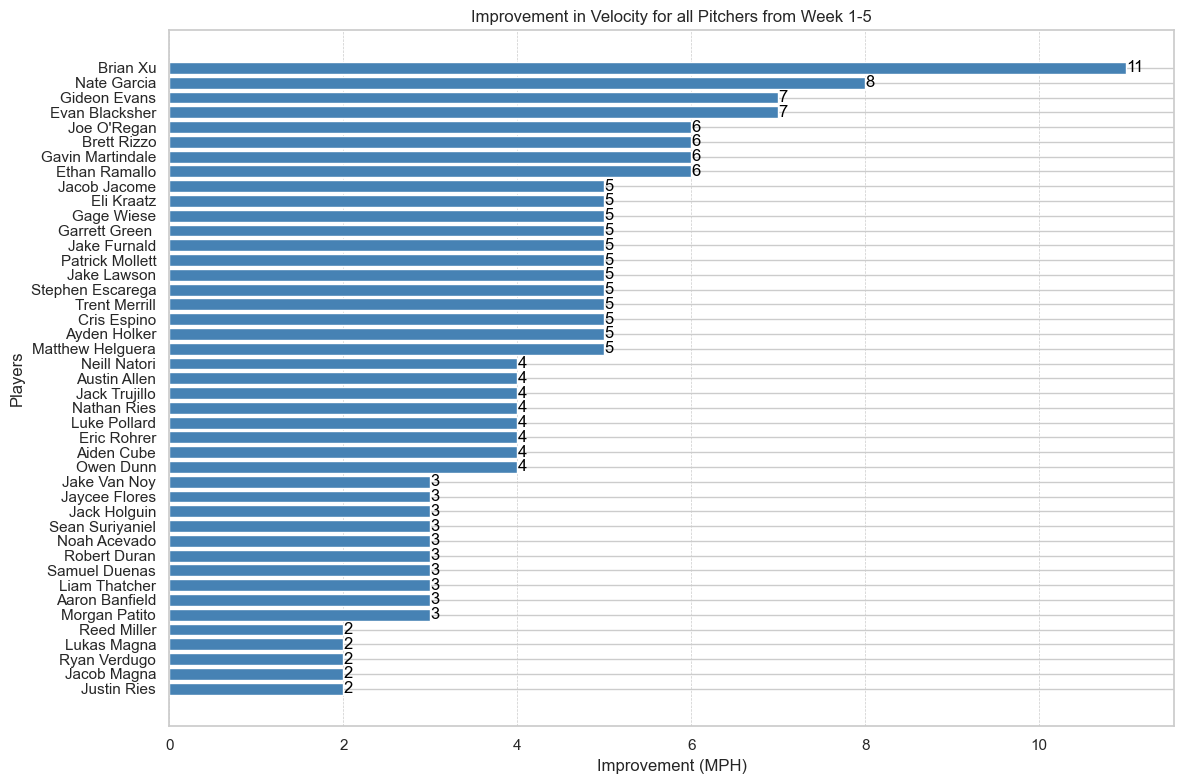

In [167]:
# Sort the DataFrame by 'Improvement' column in descending order
sorted_df = updated_df.sort_values(by='Improvement', ascending=True)

# Cleaner Bar chart for the improvement of the top 10 players
plt.figure(figsize=(12, 8))

# Plotting the horizontal bar chart with a consistent color
bars = plt.barh(range(len(sorted_df)), sorted_df['Improvement'], color='steelblue')

# Setting y-axis tick positions and labels
plt.yticks(range(len(sorted_df)), sorted_df['Player'], rotation=0, ha='right')

# Adding data labels to the right of each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2.0, round(xval, 2), ha='left', va='center', color='black')

# Setting title and labels
plt.title('Improvement in Velocity for all Pitchers from Week 1-5')
plt.xlabel('Improvement (MPH)')
plt.ylabel('Players')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

plt.tight_layout()
plt.show()

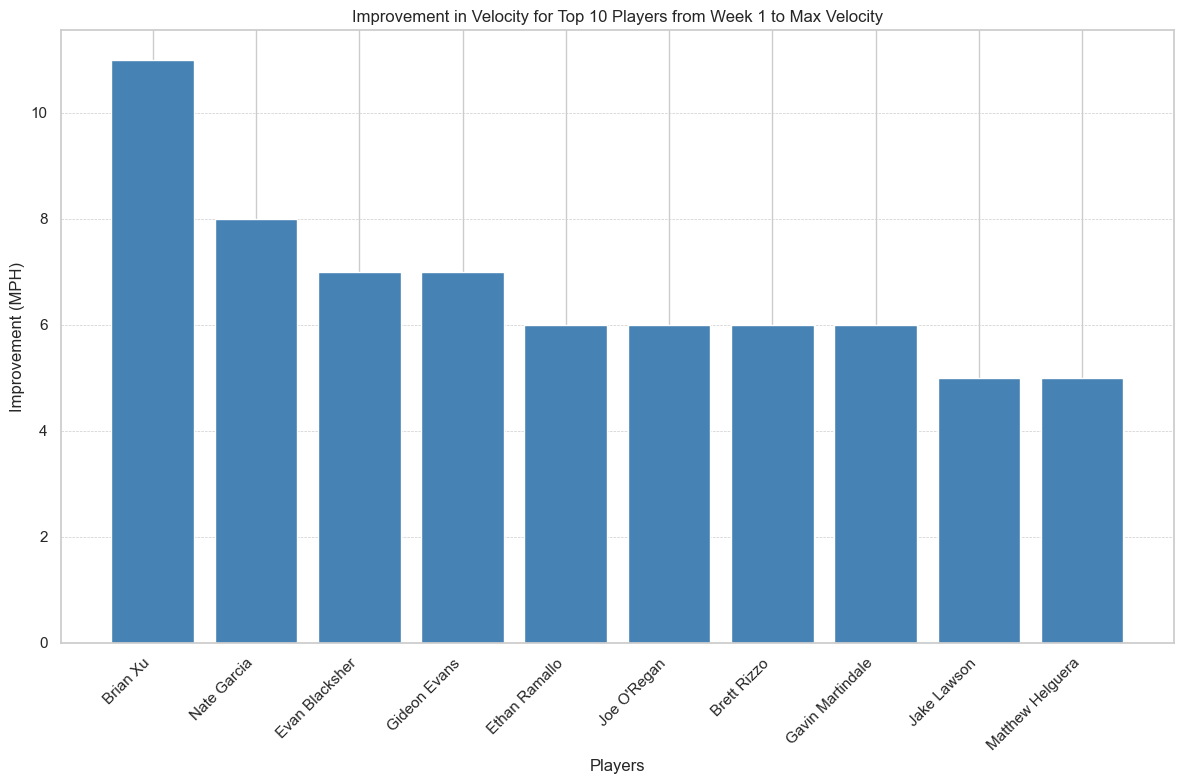

In [168]:
# Calculating improvement for each player using the correct column
updated_df['Improvement'] = updated_df['Max_MPH'] - updated_df['Velo Day 1']

# Sorting the dataframe by 'Improvement' in descending order to get the top 10
top_10_players = updated_df.nlargest(10, 'Improvement')

# Sorting the top 10 players in descending order for visualization
sorted_df = top_10_players.sort_values(by='Improvement', ascending=False)

# Plotting the bar chart for the top 10 players in descending order of improvement
plt.figure(figsize=(12,8))
plt.bar(sorted_df['Player'], sorted_df['Improvement'], color='steelblue')

# Setting title and labels
plt.title('Improvement in Velocity for Top 10 Players from Week 1 to Max Velocity')
plt.xlabel('Players')
plt.ylabel('Improvement (MPH)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()

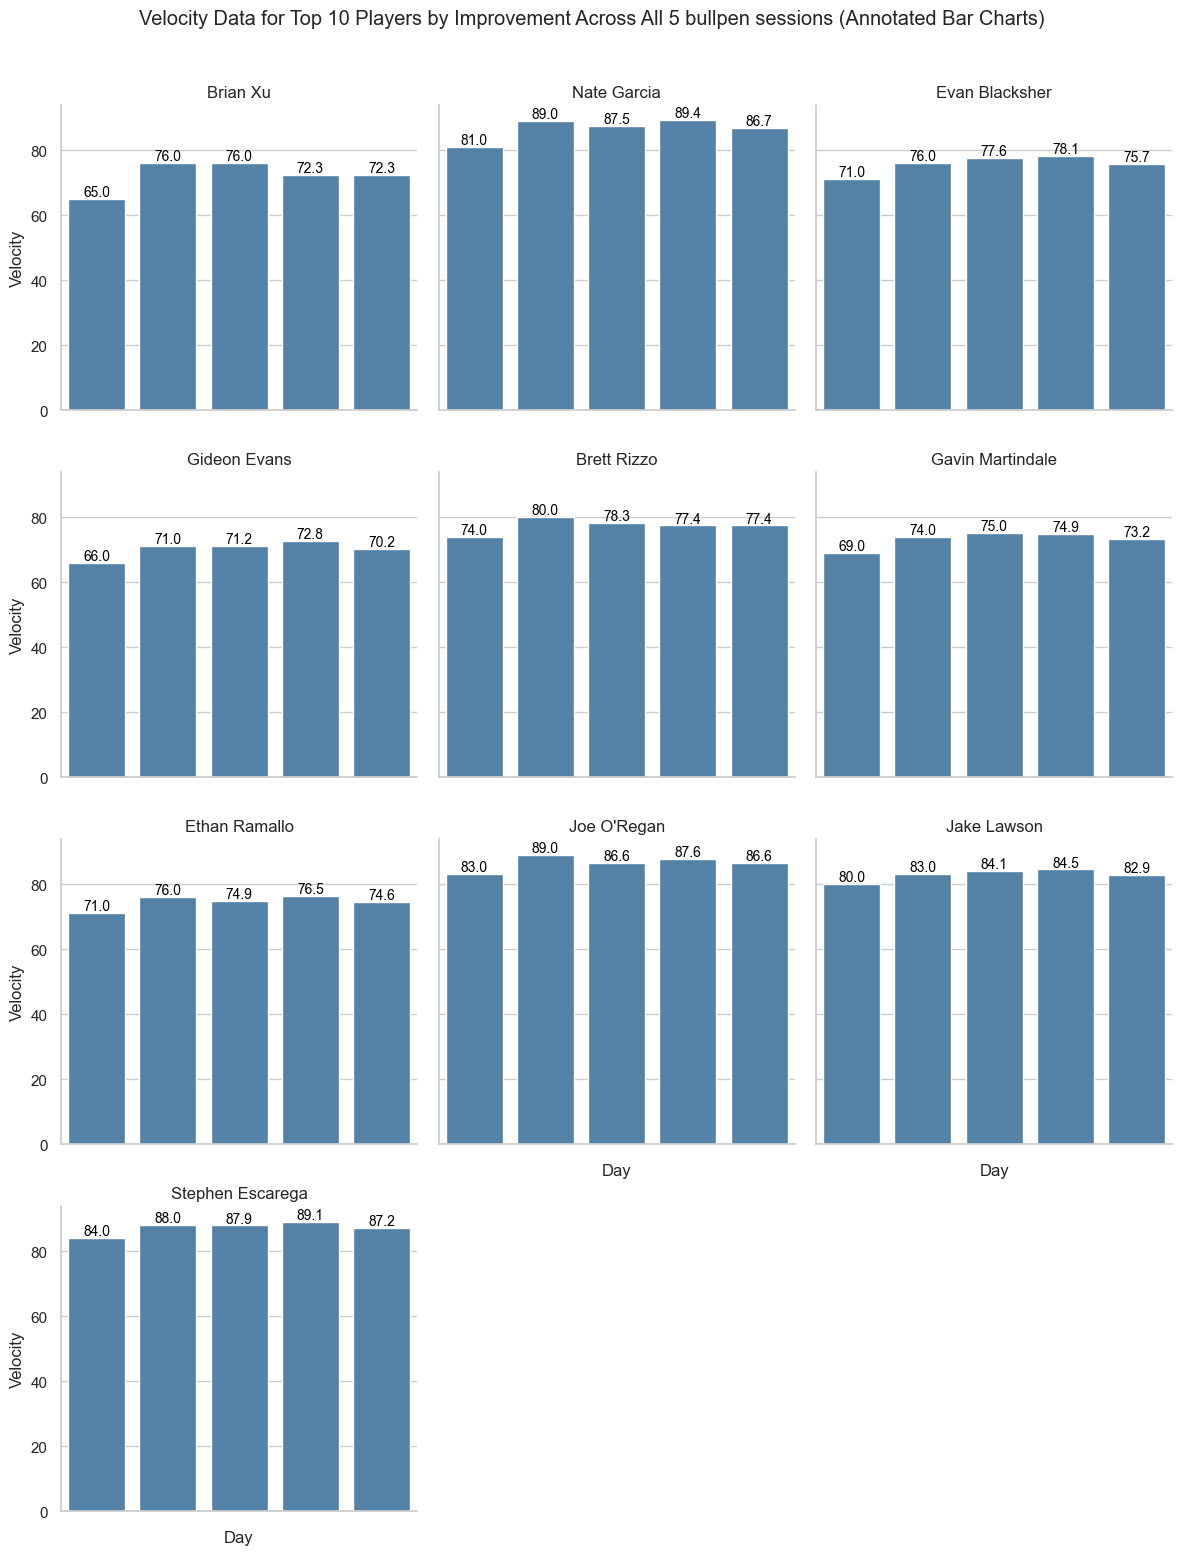

In [169]:
# Calculate improvement for each player
updated_df['Improvement'] = updated_df['Max_MPH'] - updated_df['Velo Day 1']

# Determine the top 10 players by improvement
top_10_players = updated_df.sort_values(by='Improvement', ascending=False).head(10)

# Melting the top 10 players' dataframe for easier plotting
melted_df = pd.melt(top_10_players, id_vars=['Player', 'Improvement'], 
                   value_vars=['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4', 'Velo Day 5'], 
                   var_name='Day', value_name='Velocity')

# Adjusting the function to annotate the bars with their values
def annotate_bars(data, **kws):
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

# Creating a FacetGrid with annotated bar charts for velocities across days for each player
g = sns.FacetGrid(melted_df, col='Player', col_wrap=3, height=4, sharey=True, sharex=True)
g = g.map_dataframe(sns.barplot, x='Day', y='Velocity', order=['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4', 'Velo Day 5'], color="steelblue")
g.map_dataframe(annotate_bars)

# Adjusting the layout
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Velocity Data for Top 10 Players by Improvement Across All 5 bullpen sessions (Annotated Bar Charts)')

plt.show()

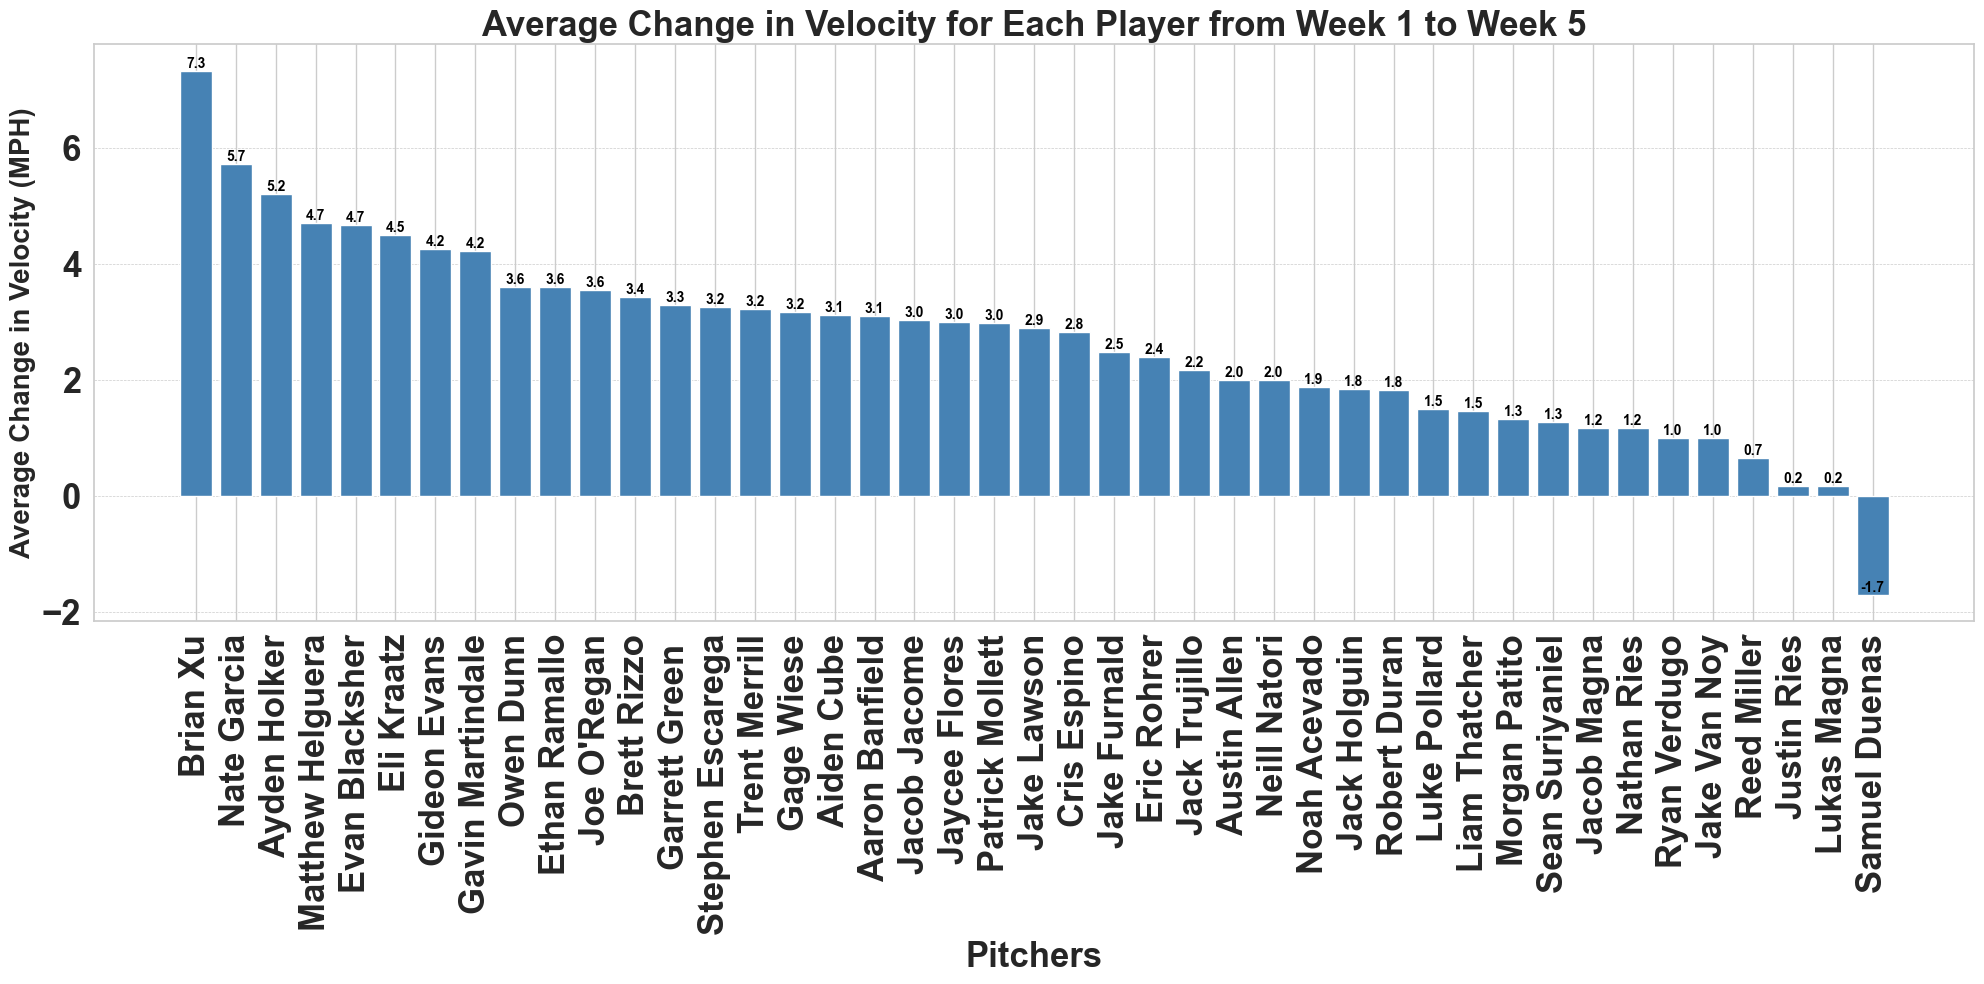

In [170]:
# Calculate the change from Day 1 to Day 5 for each player
updated_df['Change_Day1_to_Day5'] = updated_df['Velo Day 5'] - updated_df['Velo Day 1']

# Filtering out rows with missing player names
df_sorted = updated_df.dropna(subset=['Player'])

# Sort the DataFrame by 'Change_Day1_to_Day5' column in descending order
df_sorted = df_sorted.sort_values(by='Change_Day1_to_Day5', ascending=False)

# Drop rows where 'Change_Day1_to_Day5' is NaN
df_sorted_cleaned = df_sorted.dropna(subset=['Change_Day1_to_Day5'])

# Re-plotting the bar chart to visualize average change for each player
plt.figure(figsize=(20, 10))
bars = plt.bar(df_sorted_cleaned['Player'], df_sorted_cleaned['Change_Day1_to_Day5'], color='steelblue')

# Adding numeric labels above each bar (rounded to 1 decimal)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.1f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Setting title and labels with bold fontweight, larger font size, and bolder style
plt.title('Average Change in Velocity for Each Player from Week 1 to Week 5', fontweight='bold', fontsize=25)
plt.xlabel('Pitchers', fontweight='bold', fontsize=25)
plt.ylabel('Average Change in Velocity (MPH)', fontweight='bold', fontsize=20)
plt.xticks(rotation=90, fontweight='bold', fontsize=25)
plt.yticks(fontweight='bold', fontsize=25)  # Making y-axis tick labels bold as well

plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()

In [73]:
# # Filtering out rows with missing player names
# df_sorted = updated_df.dropna(subset=['Player'])

# # Sort the DataFrame by 'Change_Day1_to_Day5' column in descending order
# df_sorted = df_sorted.sort_values(by='Change_Day1_to_Day5', ascending=True)

# # Plotting the horizontal bar chart to visualize average change for each player
# plt.figure(figsize=(20, 10))
# bars = plt.barh(df_sorted['Player'], df_sorted['Change_Day1_to_Day5'], color='steelblue')  # Using barh here

# # Adding numeric labels to the right of each bar (rounded to 1 decimal)
# for bar in bars:
#     xval = bar.get_width()
#     plt.text(xval, bar.get_y() + bar.get_height()/2.0, f"{xval:.1f}", ha='left', va='center', color='black', fontsize=10, fontweight='bold')

# # Setting title and labels with bold fontweight, larger font size, and bolder style
# plt.title('Average Change in Velocity for Each Player from Week 1 to Week 5', fontweight='bold', fontsize=25)
# plt.xlabel('Average Change in Velocity (MPH)', fontweight='bold', fontsize=20)
# plt.ylabel('Players', fontweight='bold', fontsize=25)  # Set y-axis label
# plt.xticks(fontweight='bold', fontsize=25)
# plt.yticks(fontweight='bold', fontsize=20)  # Adjust y-axis tick label fontsize

# plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')  # Change to x-axis grid

# plt.tight_layout()
# plt.show()

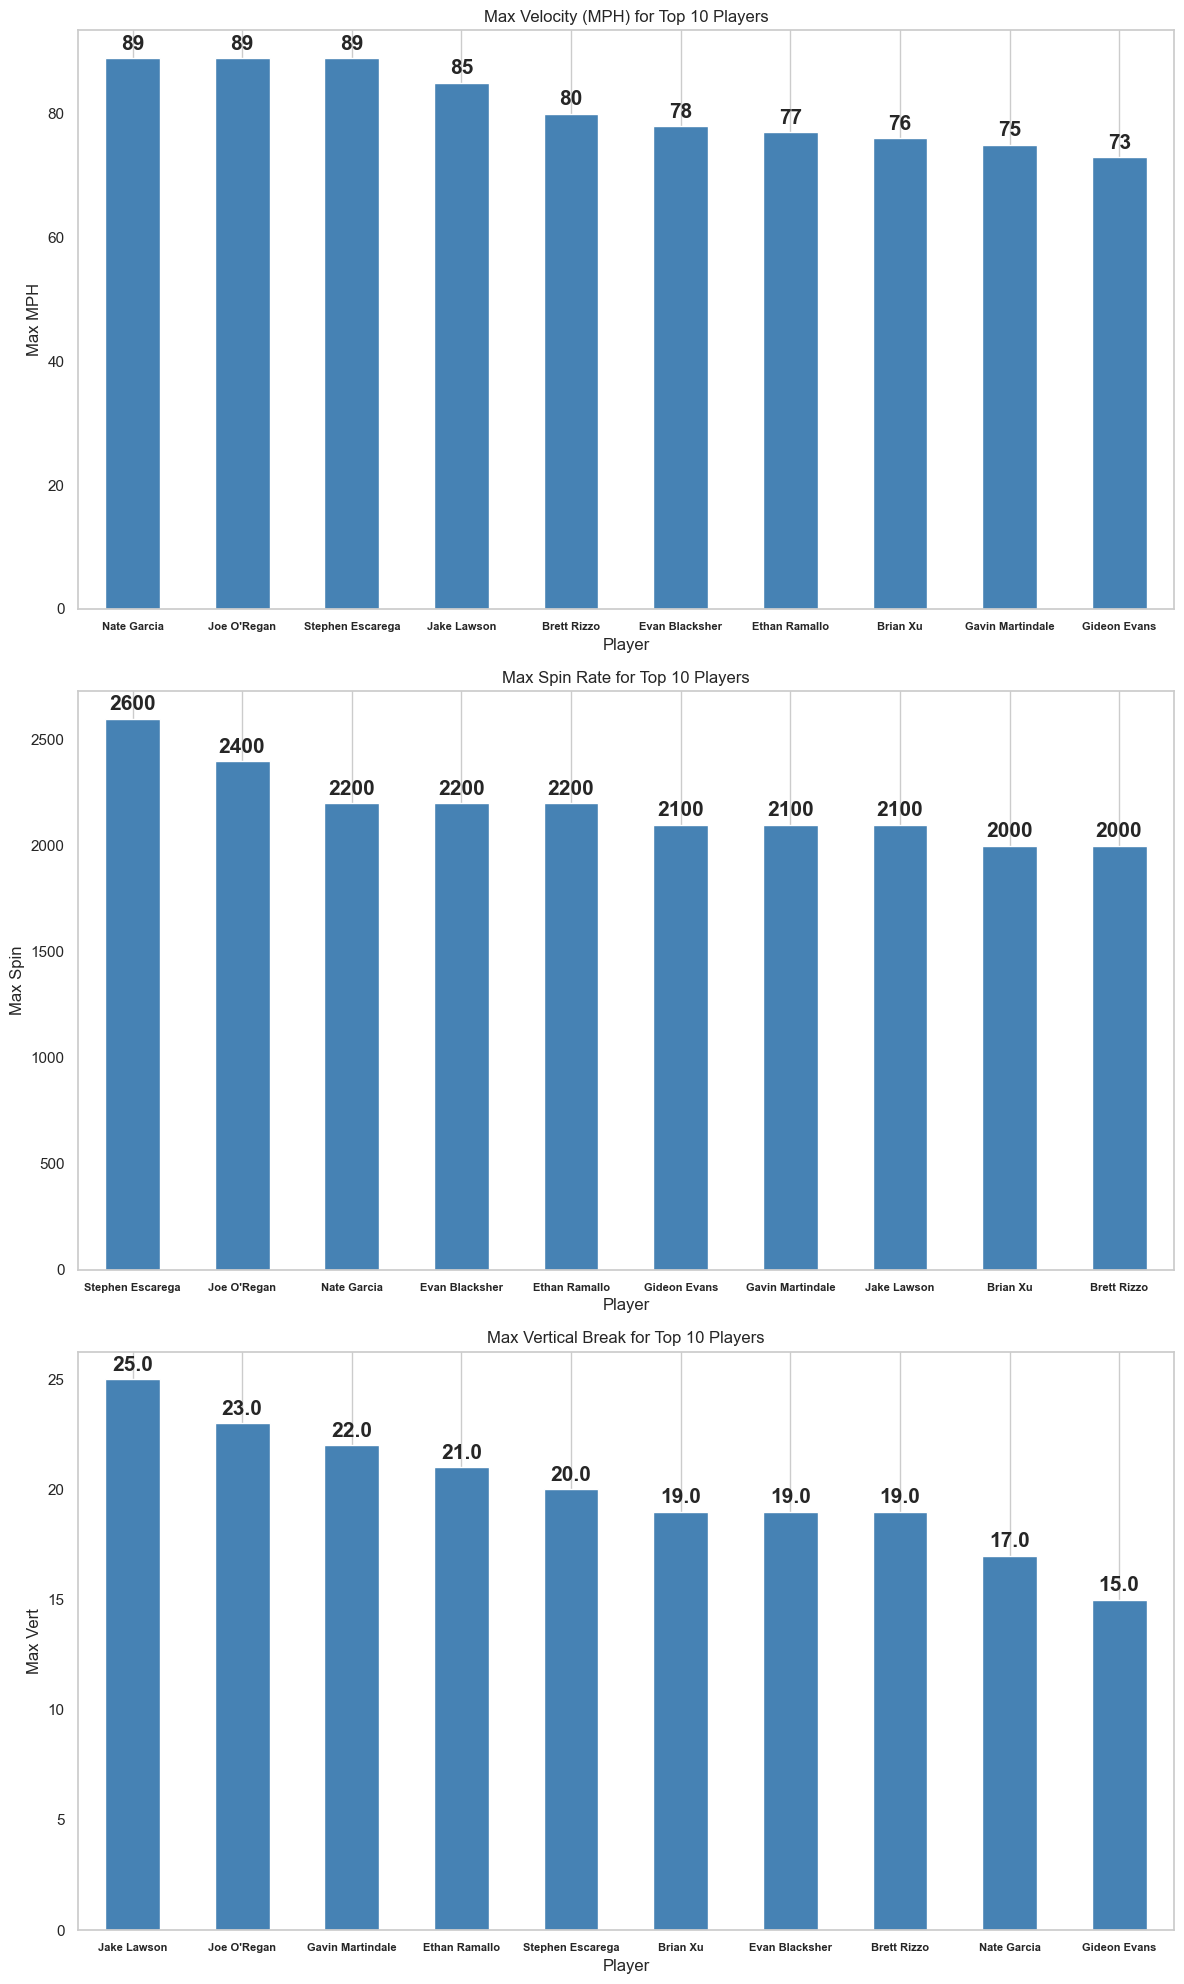

In [171]:
def plot_metrics_bar_charts(dataframe):
    # Plotting bar charts with values for each metric in descending order for each metric
    fig, axes = plt.subplots(3, 1, figsize=(12, 20))

    # List of metrics and corresponding titles
    metrics = ['Max_MPH', 'Max Spin', 'Max Vert']
    titles = ['Max Velocity (MPH) for Top 10 Players', 'Max Spin Rate for Top 10 Players', 'Max Vertical Break for Top 10 Players']
    
    for i, metric in enumerate(metrics):
        sorted_df = dataframe.sort_values(by=metric, ascending=False)
        bars = sorted_df.set_index('Player')[metric].plot(kind='bar', ax=axes[i], color='steelblue')
        axes[i].set_title(titles[i])
        axes[i].set_ylabel(metric.replace('_', ' '))
        axes[i].grid(axis='y')

        # Adding values on top of the bars
        for p in axes[i].patches:
            value_format = "{:.1f}" if metric == 'Max Vert' else "{:.0f}"
            axes[i].annotate(value_format.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15,fontweight='bold')
        
        # Rotating 'Player' labels at 45 degrees
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=360, ha='center',fontweight='bold',fontsize=8)
        
    plt.tight_layout()
    plt.show()

# Assuming you have a DataFrame named 'top_10_df'
plot_metrics_bar_charts(top_10_players)

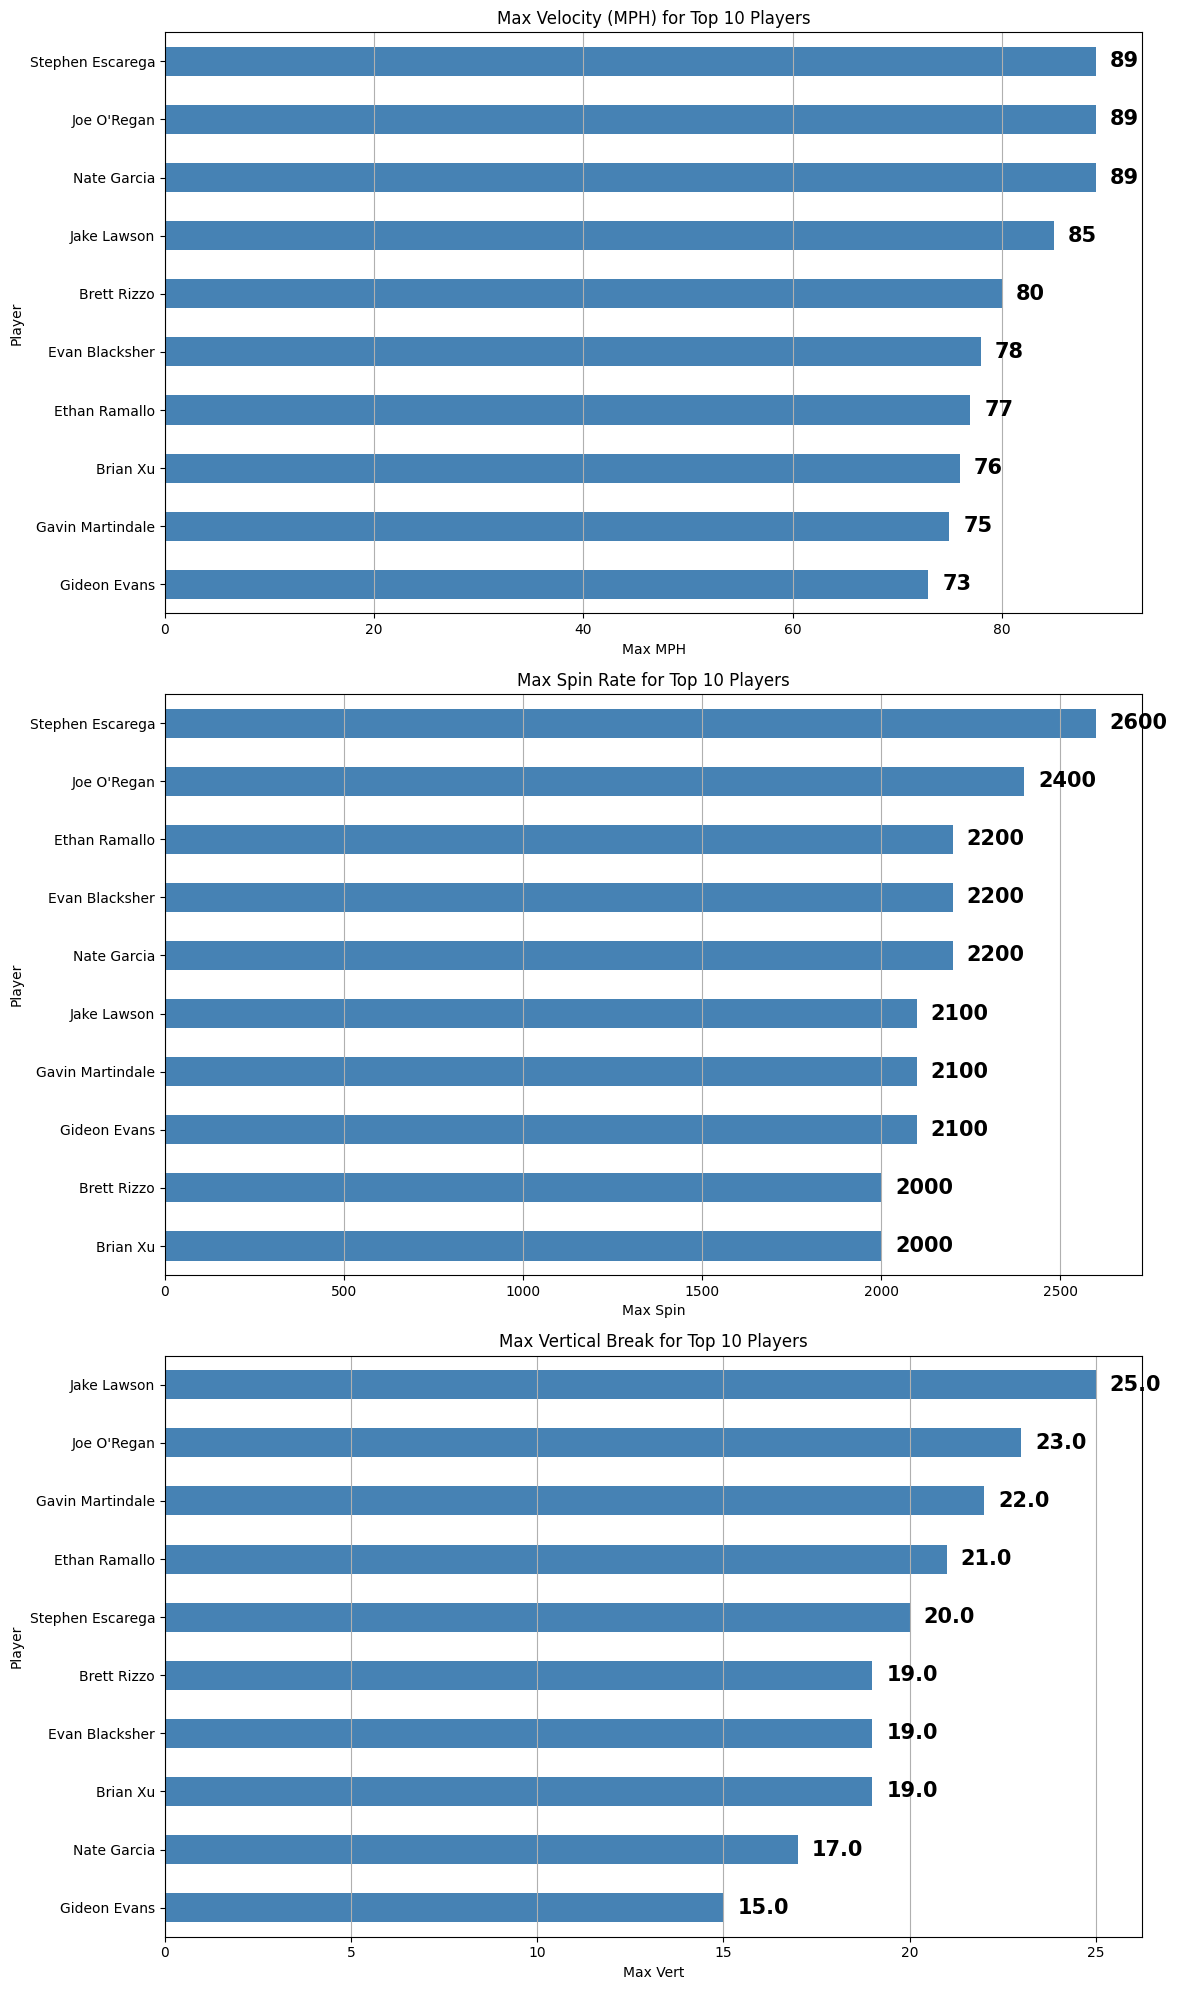

In [67]:
def plot_metrics_bar_charts(dataframe):
    # Plotting bar charts with values for each metric in descending order for each metric
    fig, axes = plt.subplots(3, 1, figsize=(12, 20))

    # List of metrics and corresponding titles
    metrics = ['Max_MPH', 'Max Spin', 'Max Vert']
    titles = ['Max Velocity (MPH) for Top 10 Players', 'Max Spin Rate for Top 10 Players', 'Max Vertical Break for Top 10 Players']
    
    for i, metric in enumerate(metrics):
        sorted_df = dataframe.sort_values(by=metric, ascending=True)
        bars = sorted_df.set_index('Player')[metric].plot(kind='barh', ax=axes[i], color='steelblue')  # Use barh here
        axes[i].set_title(titles[i])
        axes[i].set_xlabel(metric.replace('_', ' '))  # Set metric name as xlabel
        axes[i].grid(axis='x')  # Change to x-axis grid

        # Adding values on the right side of the bars
        for p in bars.patches:
            value_format = "{:.1f}" if metric == 'Max Vert' else "{:.0f}"
            axes[i].annotate(value_format.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center', xytext=(10, 0), textcoords='offset points', fontsize=15, fontweight='bold')
        
        # Set y-axis labels as player names and adjust alignment and spacing
        player_names = [name.get_text() for name in axes[i].get_yticklabels()]
        axes[i].set_yticks(range(len(player_names)))
        axes[i].set_yticklabels(player_names, ha='right', fontsize=10)  # Set ha='right'
        plt.subplots_adjust(left=0.3)  # Adjust the left margin to provide space for player names
        
    plt.tight_layout()
    plt.show()

# Assuming you have a DataFrame named 'top_10_players'
plot_metrics_bar_charts(top_10_players)

In [172]:
# Calculating the improvement in RPM for each player
updated_df['RPM_Improvement'] = updated_df['Max Spin'] - updated_df['Spin Day 1']

# Selecting top 10 players based on 'RPM_Improvement'
top_10_rpm_improvement = updated_df[['Player', 'RPM_Improvement']].sort_values(by='RPM_Improvement', ascending=False).head(10)

top_10_rpm_improvement


,Player,RPM_Improvement
20,Gideon Evans,400
3,Brian Xu,400
40,Aiden Cube,400
7,Jacob Jacome,400
15,Brett Rizzo,400
1,Matthew Helguera,400
27,Owen Dunn,300
19,Garrett Green,300
32,Austin Allen,300
31,Trent Merrill,300


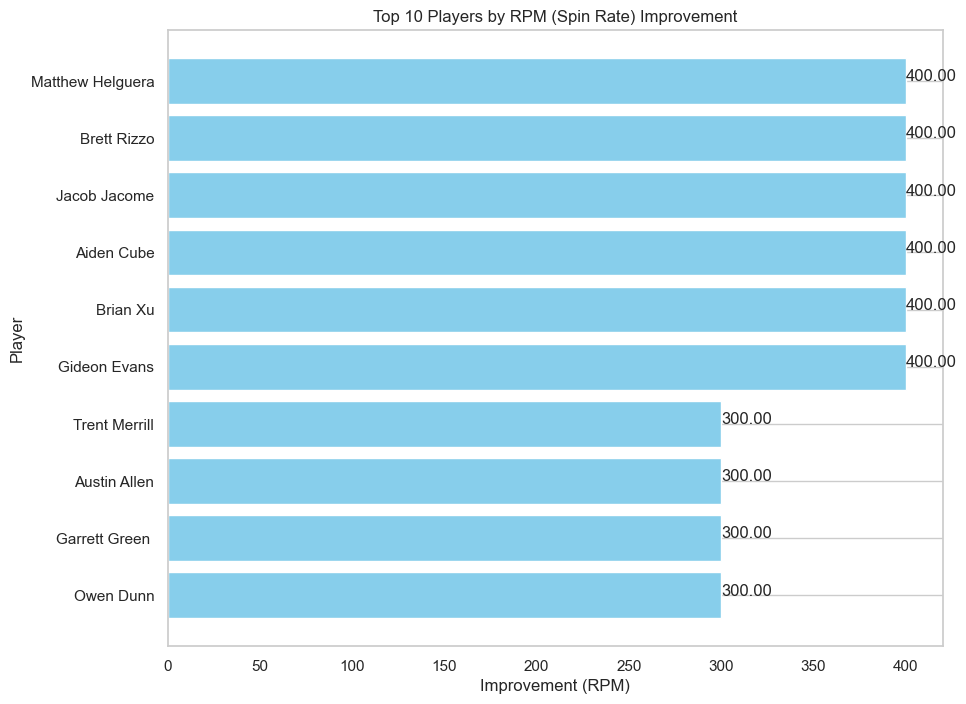

In [173]:
def plot_improvement_RPM(data, column, ylabel, title):
    """
    Plots the improvement for a given metric for the top 10 players.
    
    Parameters:
    - data: DataFrame containing the improvement data.
    - column: The column name in the DataFrame containing the improvement values.
    - ylabel: The label for the y-axis.
    - title: The title for the plot.
    """
    # Sorting data
    data = data.sort_values(by=column, ascending=True)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(data['Player'], data[column], color='skyblue')
    plt.xlabel(ylabel)
    plt.ylabel('Player')
    plt.title(title)
    plt.grid(axis='x')
    
    # Adding data labels
    for index, value in enumerate(data[column]):
        plt.text(value, index, f"{value:.2f}")
    
    plt.show()

# Assuming you have a dataframe called top_10_rpm_improvement with the relevant data:
plot_improvement_RPM(top_10_rpm_improvement, 'RPM_Improvement', 'Improvement (RPM)', 'Top 10 Players by RPM (Spin Rate) Improvement')


## Scatter Plots

In [176]:
# # Computing the correlation between "Max Spin" and "Difference_Day4" (improvement from Day 1 to Day 4)
# correlation = updated_df['Max Spin'].corr(updated_df['Difference_Day4'])

# # Plotting the scatter plot
# plt.figure(figsize=(12,8))
# for index, row in updated_df.iterrows():
#     plt.scatter(row['Max Spin'], row['Difference_Day4'], label=row['Player'], s=100)
#     plt.annotate(row['Player'], (row['Max Spin']+2, row['Difference_Day4']), fontsize=10, alpha=0.75)

# plt.title('Correlation between Max Spin and Improvement in Velocity (Day 1 to Day 4)')
# plt.xlabel('Max Spin')
# plt.ylabel('Improvement in Velocity (MPH)')
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# plt.tight_layout()
# plt.show()

# correlation

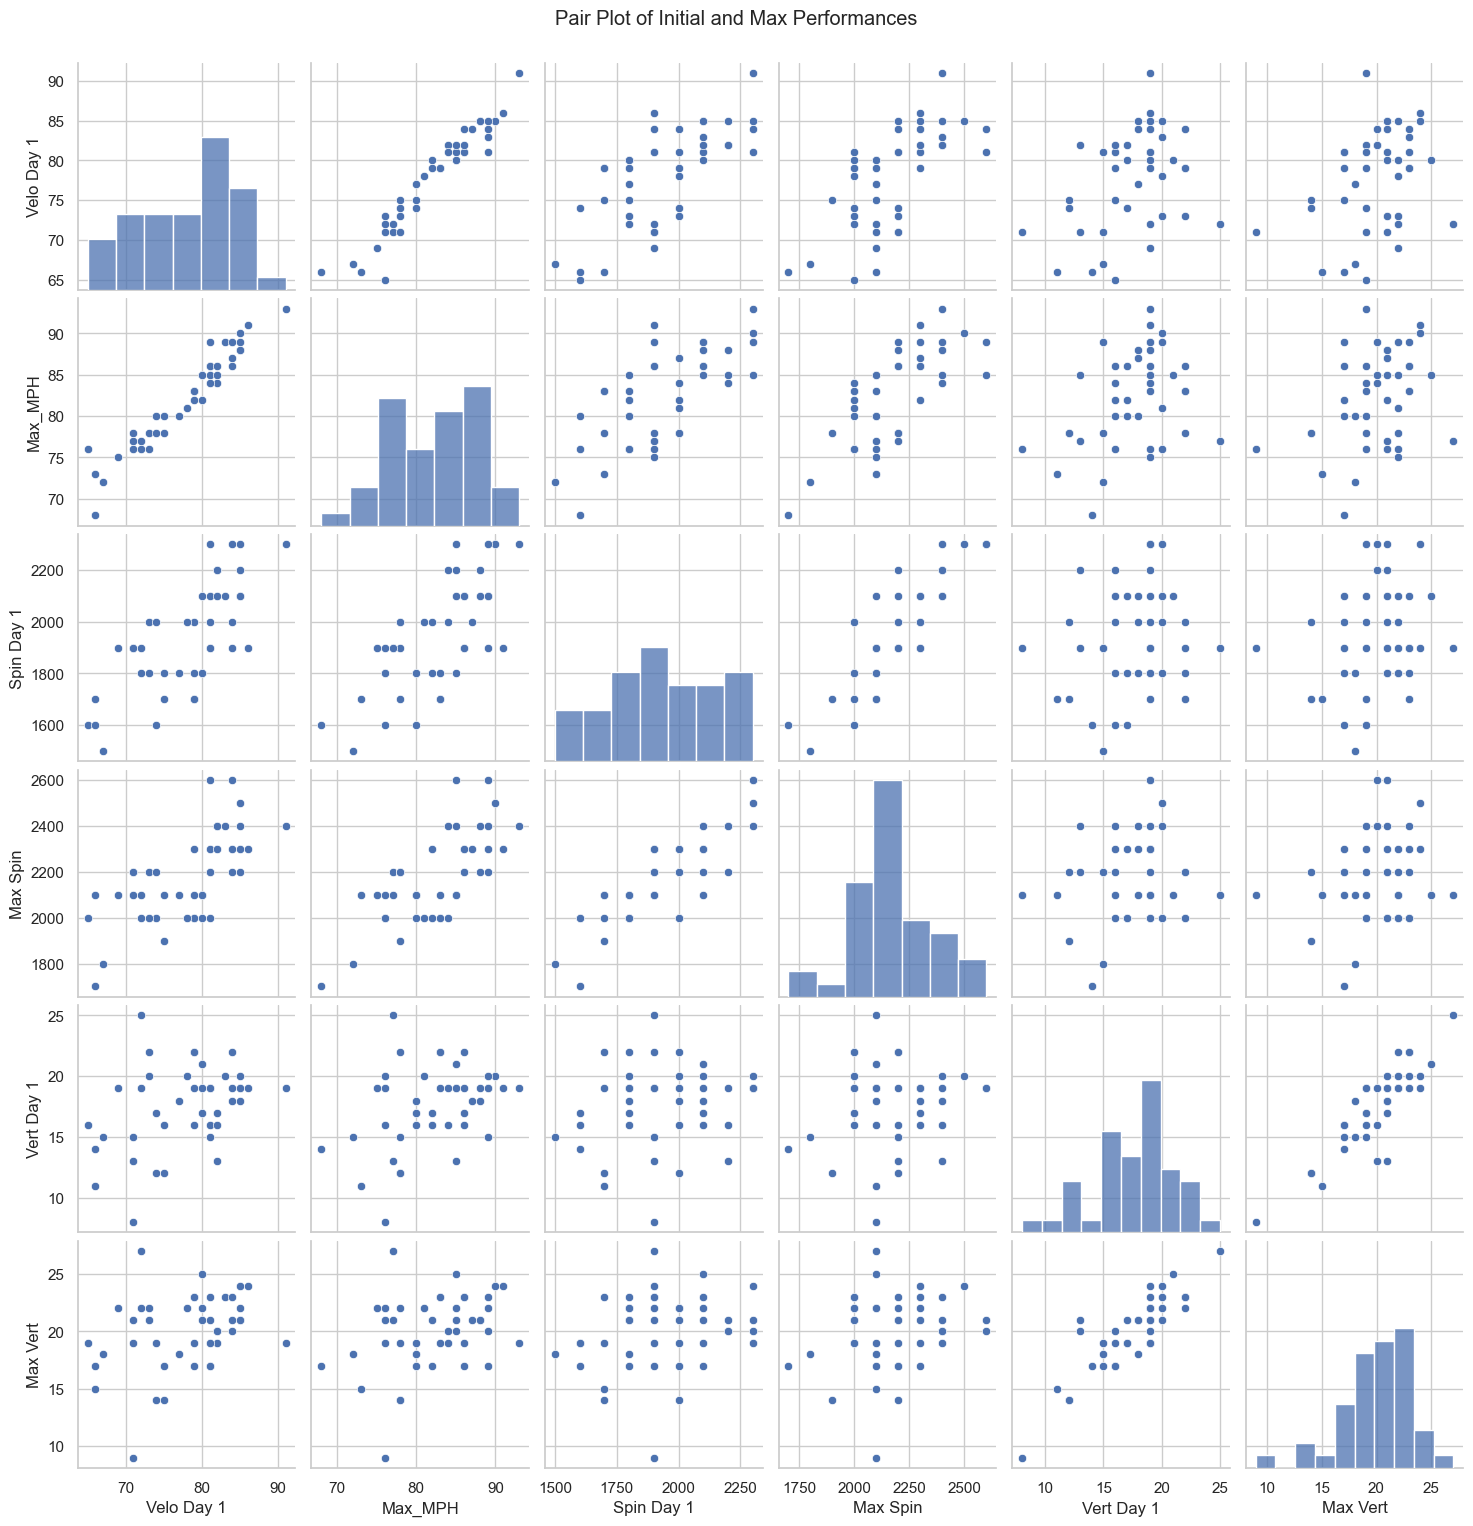

In [177]:
# Adjusting the selected columns for the pair plot
selected_columns_adjusted = ["Velo Day 1", "Max_MPH", "Spin Day 1", "Max Spin", "Vert Day 1", "Max Vert"]

# Creating the pair plot
sns.pairplot(updated_df[selected_columns_adjusted])
plt.suptitle('Pair Plot of Initial and Max Performances', y=1.02)
plt.show()

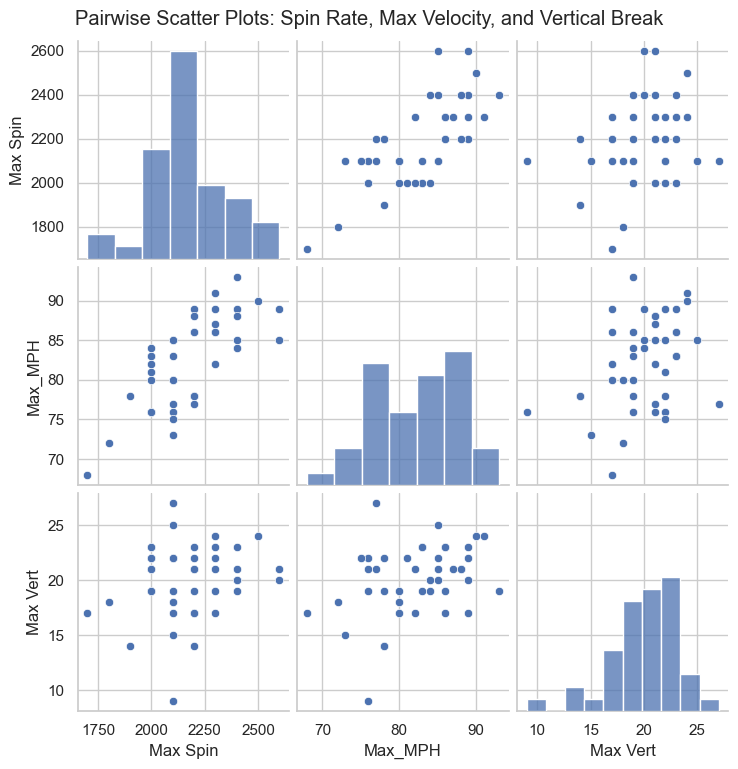

In [178]:
# Using the correct columns for generating the pair plot
pair_plot_data_correct = updated_df[['Max Spin', 'Max_MPH', 'Max Vert']]

# Creating the pair plot
sns.pairplot(pair_plot_data_correct)
plt.suptitle('Pairwise Scatter Plots: Spin Rate, Max Velocity, and Vertical Break', y=1.02)
plt.show()

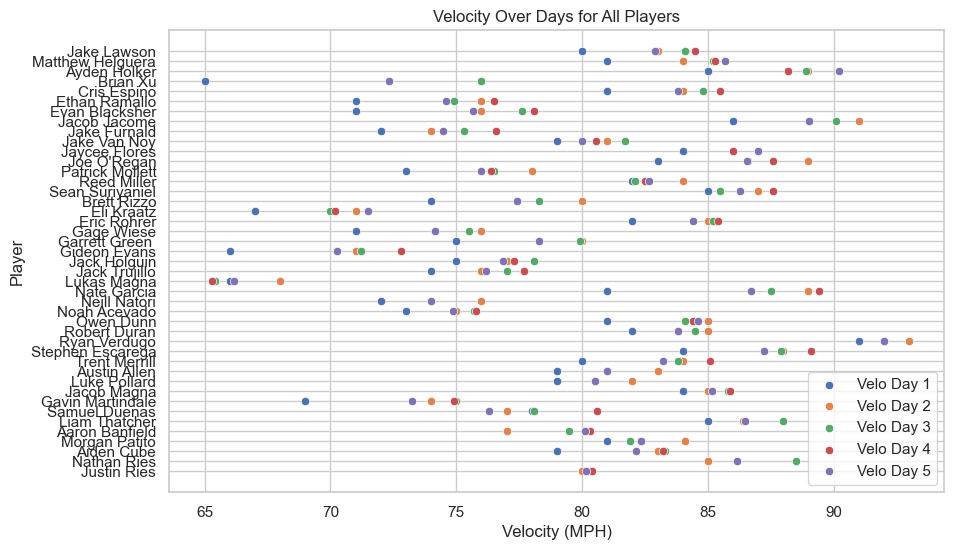

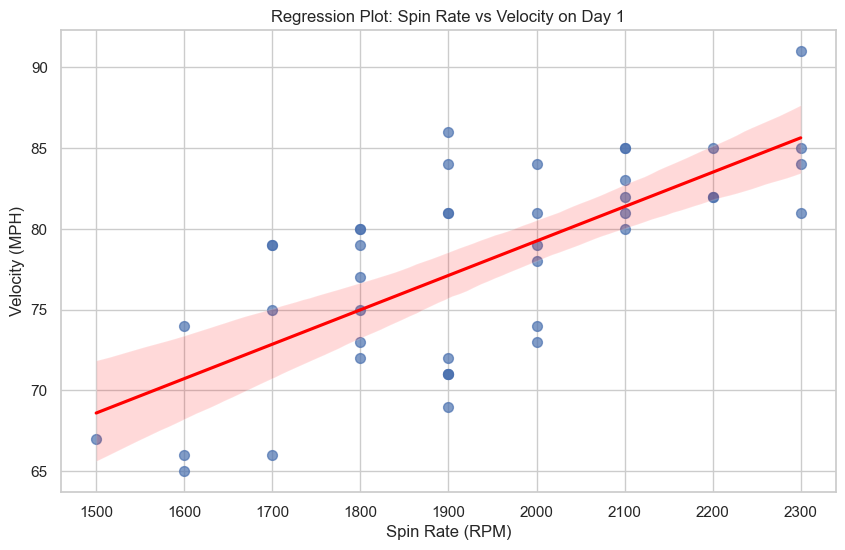

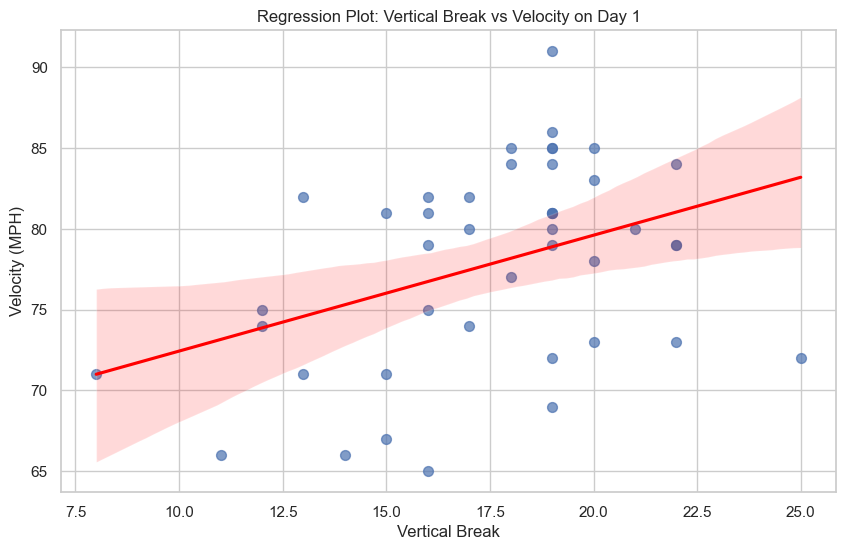

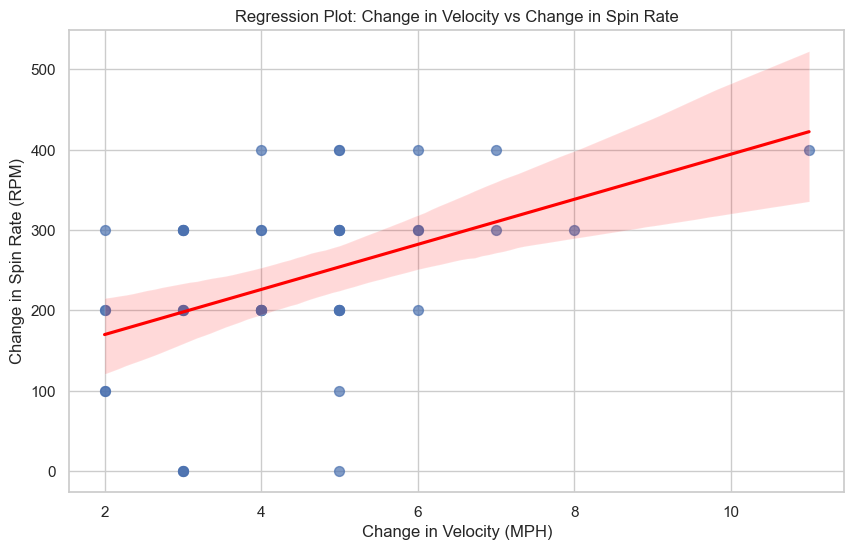

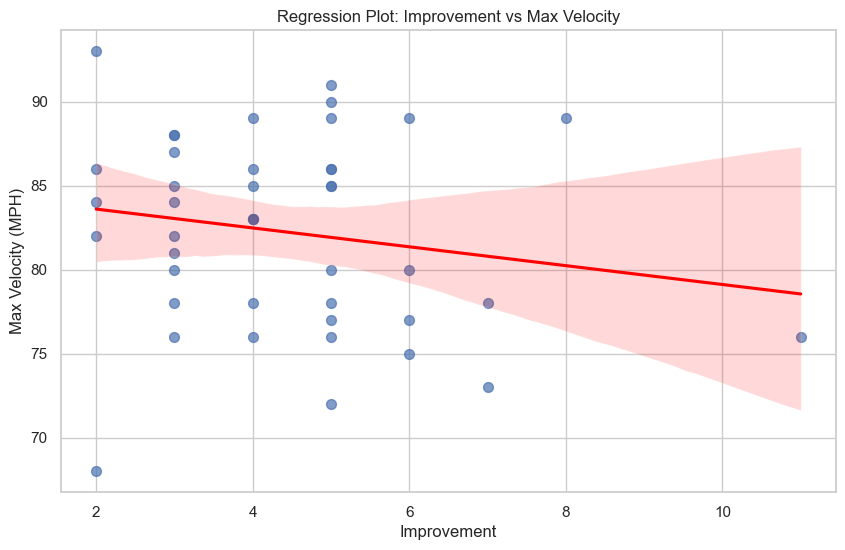

In [179]:
# 1. Velocity Over Days for all players
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    sns.scatterplot(x=f'Velo Day {i}', y='Player', data=updated_df, label=f'Velo Day {i}')
plt.title('Velocity Over Days for All Players')
plt.xlabel('Velocity (MPH)')
plt.ylabel('Player')
plt.legend()
plt.show()

# 2. Spin Rate vs Velocity
plt.figure(figsize=(10, 6))
sns.regplot(x='Spin Day 1', y='Velo Day 1', data=updated_df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Regression Plot: Spin Rate vs Velocity on Day 1')
plt.xlabel('Spin Rate (RPM)')
plt.ylabel('Velocity (MPH)')
plt.show()

# 3. Vertical Break vs Velocity
plt.figure(figsize=(10, 6))
sns.regplot(x='Vert Day 1', y='Velo Day 1', data=updated_df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Regression Plot: Vertical Break vs Velocity on Day 1')
plt.xlabel('Vertical Break')
plt.ylabel('Velocity (MPH)')
plt.show()

# 4. Change in Velocity vs Change in Spin Rate
plt.figure(figsize=(10, 6))
sns.regplot(x='Change_Velo', y='Change_RPM', data=updated_df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Regression Plot: Change in Velocity vs Change in Spin Rate')
plt.xlabel('Change in Velocity (MPH)')
plt.ylabel('Change in Spin Rate (RPM)')
plt.show()

# 5. Improvement Metrics
plt.figure(figsize=(10, 6))
sns.regplot(x='Improvement', y='Max_MPH', data=updated_df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Regression Plot: Improvement vs Max Velocity')
plt.xlabel('Improvement')
plt.ylabel('Max Velocity (MPH)')
plt.show()

#### Box Plots & Strip Plots

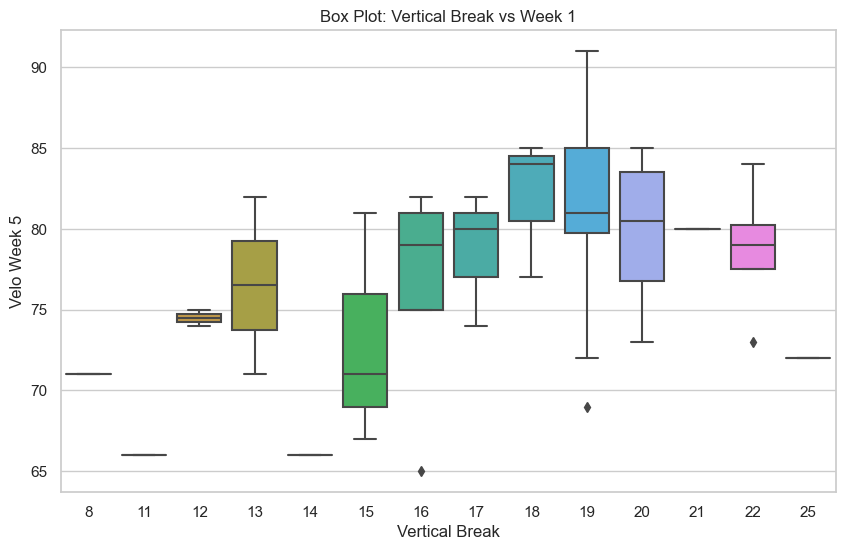

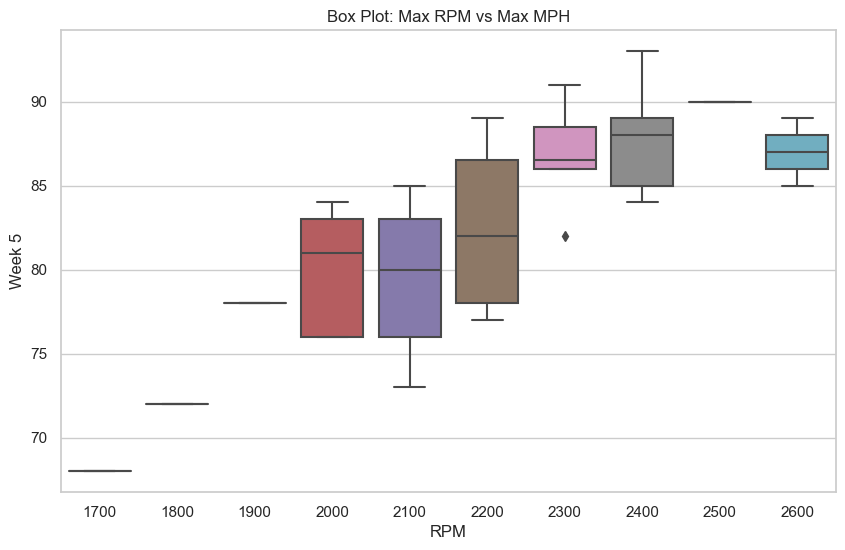

In [251]:
# Box Plot for all Pitchers
# Box Plot: Vertical Break vs Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vert Day 1', y='Velo Day 1', data=updated_df)
plt.title('Box Plot: Vertical Break vs Week 1')
plt.xlabel('Vertical Break')
plt.ylabel('Velo Week 5')
plt.show()


# Box Plot: Vertical Break vs Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Max Spin', y='Max_MPH', data=updated_df)
plt.title('Box Plot: Max RPM vs Max MPH')
plt.xlabel('RPM')
plt.ylabel('Week 5')
plt.show()

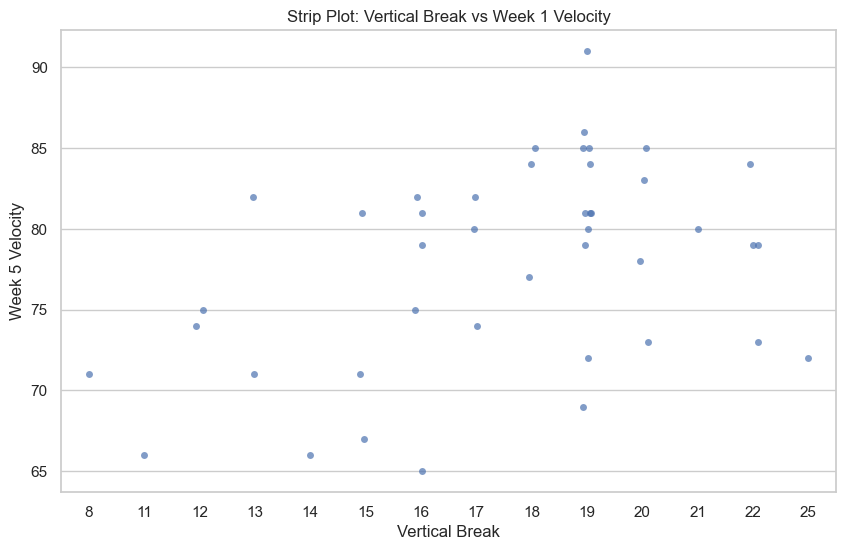

In [252]:
# Same visuals as the box plots but as a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Vert Day 1', y='Velo Day 1', data=updated_df, jitter=True, alpha=0.7)
plt.title('Strip Plot: Vertical Break vs Week 1 Velocity')
plt.xlabel('Vertical Break')
plt.ylabel('Week 5 Velocity')
plt.show()

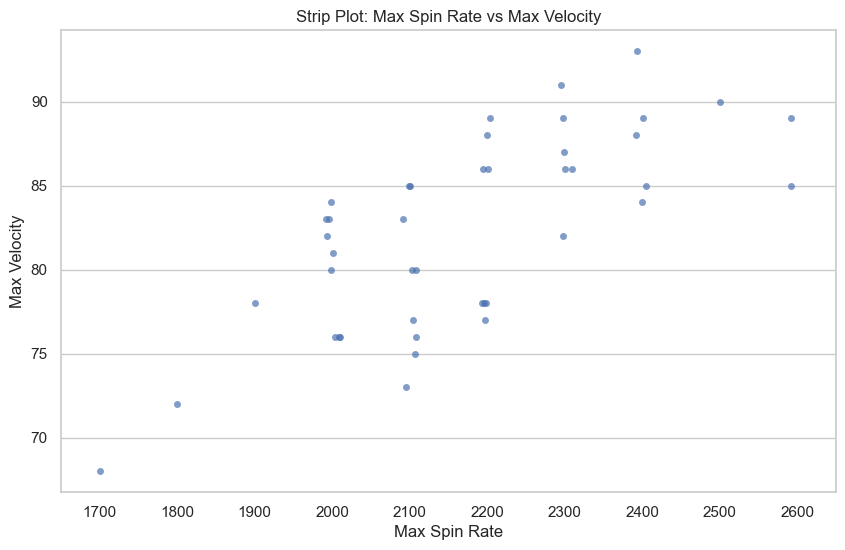

In [253]:
# Same visuals as the box plots but as a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Max Spin', y='Max_MPH', data=updated_df, jitter=True, alpha=0.7)
plt.title('Strip Plot: Max Spin Rate vs Max Velocity')
plt.xlabel('Max Spin Rate')
plt.ylabel('Max Velocity')
plt.show()

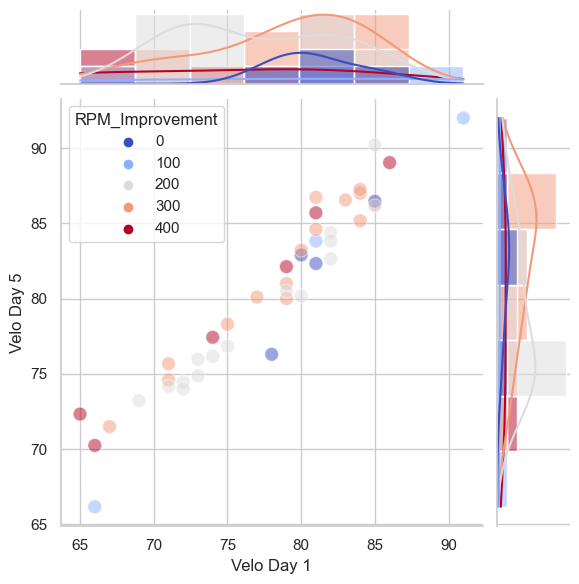

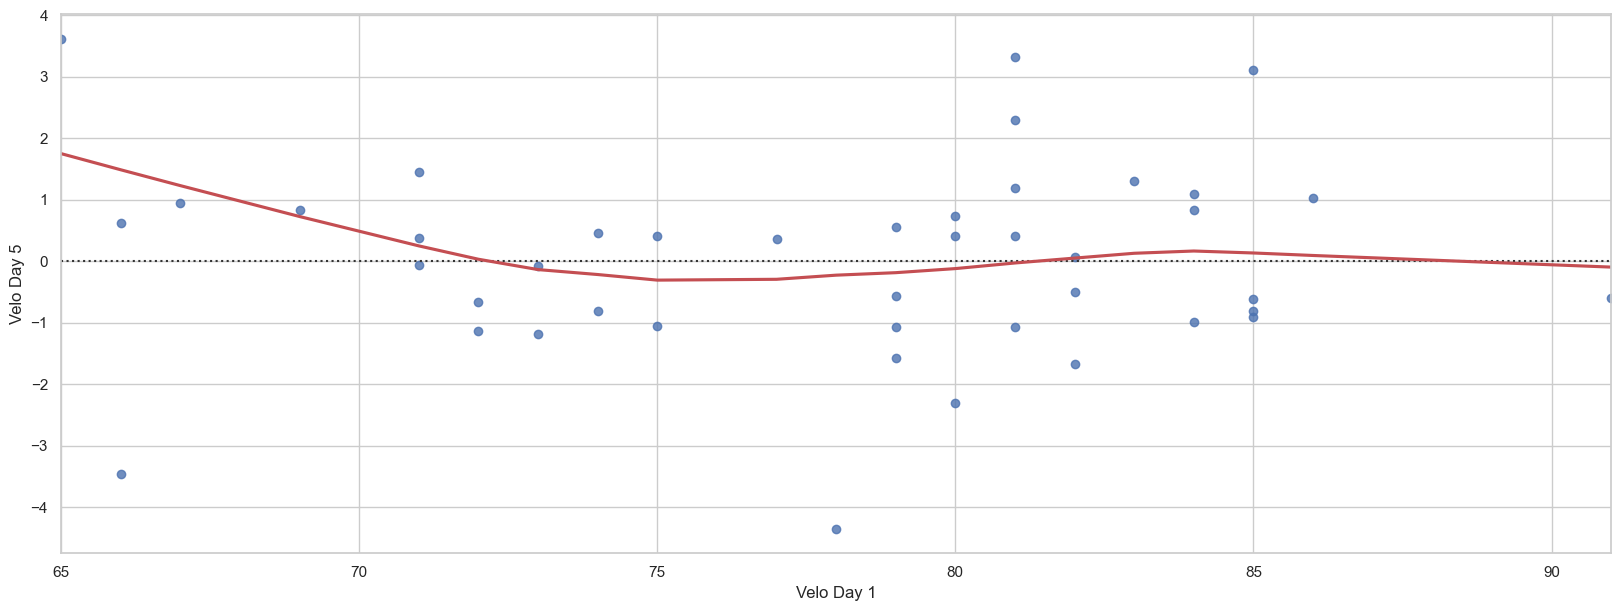

In [181]:
# Customizing the JointGrid plot with a different palette for 'RPM_Improvement'
g = sns.JointGrid(data=updated_df, x="Velo Day 1", y="Velo Day 5", hue='RPM_Improvement', palette="coolwarm")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)
plt.show()

# Residual plot for "Velo Day 1" and "Max_MPH"
sns.residplot(data=updated_df, x="Velo Day 1", y="Velo Day 5", lowess=True, line_kws=dict(color="r"))
plt.show()


### Stastical Analysis

In [206]:
# Descriptive statistics for the velocities of the top 5 players across the five days
desc_stats = top_5_players[['Player', 'Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4', 'Velo Day 5']].set_index('Player').describe().transpose()

# Displaying the descriptive statistics
desc_stats

,count,mean,std,min,25%,50%,75%,max
Velo Day 1,5.0,71.40,6.503845,65.00,66.00,71.00,74.00,81.00
Velo Day 2,5.0,78.40,6.730527,71.00,76.00,76.00,80.00,89.00
Velo Day 3,5.0,78.12,5.930177,71.20,76.00,77.60,78.30,87.50
Velo Day 4,5.0,80.44,6.013464,72.80,78.10,80.95,80.95,89.40
Velo Day 5,5.0,82.35,0.000000,82.35,82.35,82.35,82.35,82.35


In [123]:
# ANOVA to compare means across multiple groups
from scipy.stats import f_oneway
# T-Test to compare the means of different days or metrics
from scipy.stats import ttest_ind


# Adding a print statement for better organization of the output
print("Statistical Analysis for All Players Across All Metrics:\n")
print("Descriptive Statistics for all players across metrics:\n")
print(updated_df.describe())


print("\nT-Test Results:")

# Comparing means of 'Velo Day 1' and 'Max_MPH'
t_stat, p_val = ttest_ind(updated_df['Velo Day 1'], updated_df['Max_MPH'])
print(f"\nComparing means of 'Velo Day 1' and 'Max_MPH':")
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

# Comparing means of 'Spin Day 1' and 'Max Spin'
t_stat, p_val = ttest_ind(updated_df['Spin Day 1'], updated_df['Max Spin'])
print(f"\nComparing means of 'Spin Day 1' and 'Max Spin':")
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

# Comparing means of 'Vert Day 1' and 'Max Vert'
t_stat, p_val = ttest_ind(updated_df['Vert Day 1'], updated_df['Max Vert'])
print(f"\nComparing means of 'Vert Day 1' and 'Max Vert':")
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


print("\nANOVA Results:")

# Comparing means of velocities across days
f_stat, p_val = f_oneway(updated_df['Velo Day 1'], updated_df['Velo Day 2'], updated_df['Velo Day 3'], 
                         updated_df['Velo Day 4'], updated_df['Velo Day 5'])
print(f"\nComparing means of velocities across days:")
print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

# Comparing means of spin rates across days
f_stat, p_val = f_oneway(updated_df['Spin Day 1'], updated_df['Max Spin'])
print(f"\nComparing means of spin rates:")
print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

# Comparing means of vertical breaks across days
f_stat, p_val = f_oneway(updated_df['Vert Day 1'], updated_df['Max Vert'])
print(f"\nComparing means of vertical breaks:")
print(f"F-Statistic: {f_stat}, P-Value: {p_val}")


Statistical Analysis for All Players Across All Metrics:

Descriptive Statistics for all players across metrics:

       Velo Day 1  Velo Day 2  Velo Day 3  Velo Day 4  Velo Day 5  \
count   43.000000   43.000000   43.000000   43.000000   43.000000   
mean    77.860465   81.267442   81.123256   81.179845   80.523643   
std      6.266241    5.844604    5.860921    5.898189    5.965555   
min     65.000000   68.000000   65.400000   65.300000   66.175000   
25%     73.000000   76.000000   76.750000   76.950000   75.825000   
50%     79.000000   83.000000   81.700000   81.000000   81.000000   
75%     82.000000   85.000000   85.350000   85.700000   85.437500   
max     91.000000   93.000000   92.000000   92.000000   92.000000   

        Spin Day 1     Max Spin    Max_MPH  Change_Velo  Change_RPM  \
count    43.000000    43.000000  43.000000    43.000000   43.000000   
mean   1934.883721  2172.093023  82.255814     4.395349  237.209302   
std     208.033561   194.355567   5.699177     1.78

### Machine Learning 


#### Deliverable for ML

1. Create a target variable from the Improved column, where 1 is for "Improved" and 0 is for "Not Improved".
2. Select features to use for the models. We'll exclude the 'Player' and 'Improved' columns.
3. Split the data into training and testing sets.
4. Normalize the data.
5. Apply K-Nearest Neighbors (KNN) and perform a grid search to find the best parameters.
6. Apply Decision Trees and perform a grid search to find the best parameters.
7. Evaluate both models and compare their performance.

#### Scaling the Data using the Robust Scaler

In [222]:
from sklearn.preprocessing import RobustScaler

# Selecting the relevant columns for normalization
features = ['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4', 'Velo Day 5', 
            'Spin Day 1', 'Vert Day 1', 'Max Spin', 'Max Vert']

# Applying the robust scaler
scaler = RobustScaler()
normalized_data = df.copy()
normalized_data[features] = scaler.fit_transform(df[features])

normalized_data.head()

,Player,Velo Day 1,Velo Day 2,Velo Day 3,Velo Day 4,Velo Day 5,Spin Day 1,Max Spin,Max_MPH,Change_Velo,Change_RPM,Vert Day 1,Max Vert,Change_Vert_Break
0,Jake Lawson,0.111111,0.000000,0.255814,0.333333,NaN,0.666667,-0.333333,85,5,0,0.666667,1.142857,4
1,Matthew Helguera,0.222222,0.111111,0.383721,0.423729,0.482014,0.000000,0.333333,86,5,400,0.000000,0.571429,4
2,Ayden Holker,0.666667,0.666667,0.813953,0.751412,1.129496,1.333333,1.000000,90,5,200,0.333333,0.857143,4
3,Brian Xu,-1.555556,-0.777778,-0.686047,NaN,NaN,-1.000000,-0.666667,76,11,400,-1.000000,-0.571429,3
4,Cris Espino,0.222222,0.111111,0.337209,0.446328,NaN,0.666667,0.000000,86,5,100,-1.000000,-1.142857,1


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = normalized_data[features]
y = df['Max_MPH']  # Target variable

# Handling any missing values
X.fillna(X.mean(), inplace=True)

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Making predictions
y_pred = reg.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1.01632928755795, 0.9507569811934364)

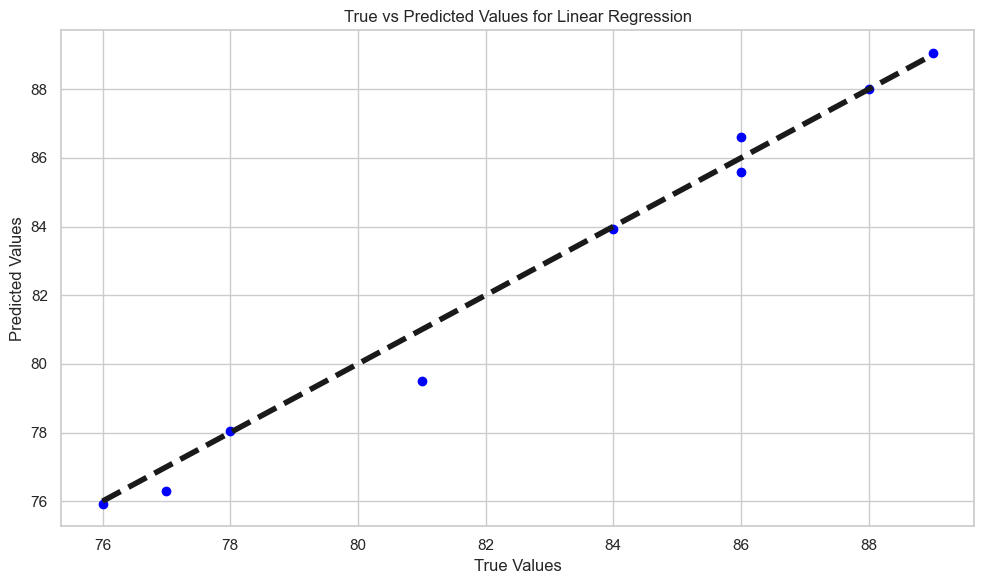

(0.6086425698040546, 0.9827749092996599)

In [224]:
# Define predictors and target variable
X = updated_df[['Velo Day 1', 'Velo Day 2', 'Velo Day 3', 'Velo Day 4', 'Velo Day 5']]
y = updated_df['Max_MPH']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Scatter plot of True vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

# Return RMSE and R^2 score for Linear Regression
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse, r2

### Logistic Regression / Binary Classficartion

In [225]:
# Calculate the median improvement
median_improvement = updated_df['Change_Velo'].median()

# Create binary target variable
updated_df['Improved'] = updated_df['Change_Velo'].apply(lambda x: 1 if x > median_improvement else 0)

# Checking the distribution of the new target variable
target_distribution = updated_df['Improved'].value_counts()

target_distribution

0    23
1    20
Name: Improved, dtype: int64

In [226]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Splitting the data into training and testing sets
X = updated_df[['Velo Day 1', 'Spin Day 1', 'Vert Day 1']]
y = updated_df['Improved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the data using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Making predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# code to improve the readability of the classification report
print("Logistic Regression Model Evaluation")
print("------------------------------------")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

Logistic Regression Model Evaluation
------------------------------------
Accuracy: 69.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.80      0.57      0.67         7

    accuracy                           0.69        13
   macro avg       0.71      0.70      0.69        13
weighted avg       0.72      0.69      0.69        13



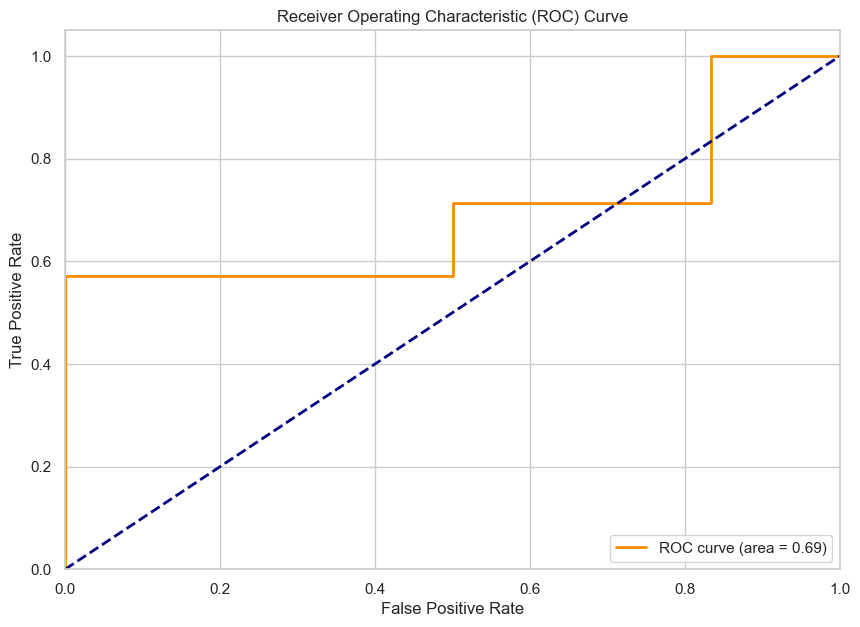

In [227]:
# Calculating the ROC curve and AUC
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting the features and target variable
features = updated_df.drop(['Player', 'Improved'], axis=1)
target = updated_df['Improved']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Normalizing the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((30, 13), (13, 13), (30,), (13,))

In [229]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Define parameter grid for KNN
param_grid = {'n_neighbors' : range(1,16)}

# Initialize GridSearchCV for KNN
grid_knn = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

# Fit the model
grid_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_knn.best_params_
best_score_knn = grid_knn.best_score_

best_params_knn, best_score_knn

({'n_neighbors': 3}, 0.7)

In [234]:
 pd.DataFrame(grid_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006346,0.014017,0.015124,0.038341,1,{'n_neighbors': 1},0.333333,0.666667,0.333333,0.666667,0.666667,1.000000,1.000000,0.666667,0.000000,0.666667,0.600000,0.290593,4
1,0.001854,0.000481,0.002011,0.000481,2,{'n_neighbors': 2},0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.666667,0.533333,0.163299,10
2,0.001416,0.000094,0.001650,0.000291,3,{'n_neighbors': 3},0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,0.700000,0.179505,1
3,0.001520,0.000267,0.001978,0.000673,4,{'n_neighbors': 4},0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,1.000000,0.333333,0.666667,0.566667,0.213437,6
4,0.001441,0.000190,0.001719,0.000480,5,{'n_neighbors': 5},0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,1.000000,1.000000,0.333333,1.000000,0.633333,0.276887,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.001619,0.000280,0.002052,0.000519,11,{'n_neighbors': 11},0.333333,0.333333,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667,0.333333,0.333333,0.466667,0.221108,13
11,0.001362,0.000055,0.001857,0.000819,12,{'n_neighbors': 12},0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.500000,0.166667,11
12,0.001694,0.000204,0.025915,0.070245,13,{'n_neighbors': 13},0.333333,0.333333,0.000000,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.466667,0.221108,13
13,0.001709,0.000106,0.002644,0.000390,14,{'n_neighbors': 14},0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.500000,0.166667,11


In [235]:
pd.DataFrame(grid_knn.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.001416,0.000094,0.001650,0.000291,3,{'n_neighbors': 3},0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,0.700000,0.179505,1
4,0.001441,0.000190,0.001719,0.000480,5,{'n_neighbors': 5},0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,1.000000,1.000000,0.333333,1.000000,0.633333,0.276887,2
6,0.001432,0.000132,0.001950,0.000633,7,{'n_neighbors': 7},0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,0.633333,0.179505,2
0,0.006346,0.014017,0.015124,0.038341,1,{'n_neighbors': 1},0.333333,0.666667,0.333333,0.666667,0.666667,1.000000,1.000000,0.666667,0.000000,0.666667,0.600000,0.290593,4
8,0.001539,0.000315,0.001595,0.000198,9,{'n_neighbors': 9},0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.600000,0.133333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.001362,0.000055,0.001857,0.000819,12,{'n_neighbors': 12},0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.500000,0.166667,11
13,0.001709,0.000106,0.002644,0.000390,14,{'n_neighbors': 14},0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.500000,0.166667,11
10,0.001619,0.000280,0.002052,0.000519,11,{'n_neighbors': 11},0.333333,0.333333,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667,0.333333,0.333333,0.466667,0.221108,13
12,0.001694,0.000204,0.025915,0.070245,13,{'n_neighbors': 13},0.333333,0.333333,0.000000,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.466667,0.221108,13


In [236]:
 grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [237]:
 y_pred = grid_knn.predict(X_test_scaled)

In [238]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [239]:
 from sklearn.metrics import accuracy_score

In [240]:
accuracy_score(y_test,y_pred)

0.46153846153846156

In [241]:
print(classification_report(y_test,y_pred,target_names=['Improved','Not Improved']))

              precision    recall  f1-score   support

    Improved       0.46      1.00      0.63         6
Not Improved       0.00      0.00      0.00         7

    accuracy                           0.46        13
   macro avg       0.23      0.50      0.32        13
weighted avg       0.21      0.46      0.29        13

